<a href="https://colab.research.google.com/github/HeyVijay5/Behavioral-Analysis-and-Fraud-Detection-for-Credit-Card-Users/blob/main/Final_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CUSTOMER BEHAVIORIAL ANALYSIS AND SEGMENTATION**

---



In [ ]:
import pandas as pd
import numpy as np


In [ ]:
main_df = pd.read_csv('/content/merged_main_df.csv')

In [ ]:
main_df.head()

,Transaction_ID,Customer_ID,Transaction_DateTime,Transaction_Type,Category,Merchant_ID,Merchant_Location,Payment_Type,Age,Gender,...,Customer_Loyalty_Score,Signup_Date,Review_ID,Category_Review,Review_Text,Review_Rating,Amount,Old_Balance,New_Balance,IsFraud
0,T000002,C07540,01-01-2023 01:00,PAYMENT,Technology,M9440,Los Angeles,Credit,67,Female,...,1.30,23-08-2042,R009739,Entertainment,This is a must-have for anyone! I was blown aw...,5,9839.64,170136.0,160296.36,0
1,T000002,C07540,01-01-2023 01:00,PAYMENT,Technology,M9440,Los Angeles,Credit,67,Female,...,1.30,23-08-2042,R012285,Health,Terrible experience! The support was unhelpful...,1,1864.28,21249.0,19384.72,0
2,T021970,C07540,04-07-2025 09:00,CASH-IN,Health,M5421,Phoenix,Mobile Payment,67,Female,...,1.30,23-08-2042,R009739,Entertainment,Truly a wonderful experience! I will definitel...,5,181.00,181.0,0.00,1
3,T021970,C07540,04-07-2025 09:00,CASH-IN,Health,M5421,Phoenix,Mobile Payment,67,Female,...,1.30,23-08-2042,R012285,Health,I was treated poorly and felt my concerns were...,1,181.00,181.0,0.00,1
4,T000003,C05794,01-01-2023 02:00,DEBIT,Health,M6868,Chicago,Credit,53,Male,...,1.31,11-11-2037,R005901,Shopping,Really enjoyed my visit! The care provided was...,4,11668.14,41554.0,29885.86,0


**Behaviorial Analysis**

**Transaction Pattern Analysis**

In [ ]:
main_df['Transaction_DateTime'] = pd.to_datetime(main_df['Transaction_DateTime'], errors='coerce')
main_df['Transaction_Hour'] = main_df['Transaction_DateTime'].dt.hour
peak_hours = main_df['Transaction_Hour'].value_counts().sort_index()
print("Peak transaction hours:\n", peak_hours)
category_preferences = main_df['Category'].value_counts()
print("Category preferences:\n", category_preferences)


Peak transaction hours:
 Transaction_Hour
0.0     1647
1.0     1598
2.0     1612
3.0     1620
4.0     1581
5.0     1697
6.0     1615
7.0     1610
8.0     1639
9.0     1681
10.0    1672
11.0    1653
12.0    1684
13.0    1613
14.0    1713
15.0    1615
16.0    1643
17.0    1644
18.0    1656
19.0    1636
20.0    1659
21.0    1706
22.0    1693
23.0    1580
Name: count, dtype: int64
Category preferences:
 Category
Travel        20163
Food          20142
Shopping      19946
Health        19924
Technology    19741
Name: count, dtype: int64


**Customer Loyalty Analysis**

In [ ]:
main_df['Loyalty_Level'] = pd.cut(main_df['Customer_Loyalty_Score'], bins=[0, 1, 2, 3, 4, 5], labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
avg_income_by_loyalty = main_df.groupby('Loyalty_Level')['Household_Income'].mean()
print("Average income by loyalty level:\n", avg_income_by_loyalty)
category_loyalty = main_df.groupby('Loyalty_Level')['Category'].value_counts(normalize=True).unstack().fillna(0)
print("Category preference by loyalty level:\n", category_loyalty)

Average income by loyalty level:
 Loyalty_Level
Very Low     94866.595745
Low          90818.332803
Medium       89658.484287
High         89021.185118
Very High    89391.541719
Name: Household_Income, dtype: float64
Category preference by loyalty level:
 Category           Food    Health  Shopping  Technology    Travel
Loyalty_Level                                                    
Very Low       0.182979  0.153191  0.170213    0.187234  0.306383
Low            0.207062  0.196524  0.198433    0.197598  0.200382
Medium         0.195813  0.199443  0.203316    0.199000  0.202428
High           0.201040  0.202513  0.197888    0.197274  0.201285
Very High      0.202513  0.199668  0.199155    0.196547  0.202118


<ipython-input-34-f27c9ab0d3d6>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_income_by_loyalty = main_df.groupby('Loyalty_Level')['Household_Income'].mean()
<ipython-input-34-f27c9ab0d3d6>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_loyalty = main_df.groupby('Loyalty_Level')['Category'].value_counts(normalize=True).unstack().fillna(0)


**Financial and Spending Analysis**

In [ ]:
spending_behavior = main_df.groupby('Customer_ID')['Amount'].agg(['mean', 'sum']).rename(columns={'mean': 'Avg_Spend', 'sum': 'Total_Spend'})
print("Spending behavior per customer:\n", spending_behavior.head())

Spending behavior per customer:
                  Avg_Spend  Total_Spend
Customer_ID                            
C00001       143121.200000    286242.40
C00005       161651.466667    969908.80
C00006        28778.663333    172671.98
C00007       150275.160000    300550.32
C00010       114981.455000    229962.91


**Cohort Analysis**

In [ ]:
main_df['Signup_Date'] = pd.to_datetime(main_df['Signup_Date'], errors='coerce')
main_df['Signup_YearMonth'] = main_df['Signup_Date'].dt.to_period('M')
cohort_spending = main_df.groupby('Signup_YearMonth')['Amount'].sum()
print("Total spending by signup cohort:\n", cohort_spending)

Total spending by signup cohort:
 Signup_YearMonth
2022-01    7298112.11
2022-02    5422612.86
2022-03    4042875.29
2022-04    2733001.12
2022-05    7746486.71
              ...    
2131-03    1965693.95
2131-04    7618296.21
2131-05    5793014.54
2131-06    4398588.07
2131-07     831365.51
Freq: M, Name: Amount, Length: 1315, dtype: float64


**Customer Lifetime Value (CLTV) Prediction**

In [ ]:
cltv_data = main_df.groupby('Customer_ID').agg({
    'Amount': 'mean',
    'Transaction_ID': 'count',
    'Signup_Date': 'min'
}).rename(columns={'Amount': 'Avg_Transaction_Value', 'Transaction_ID': 'Transaction_Frequency'})
main_df['Last_Transaction_Date'] = main_df.groupby('Customer_ID')['Transaction_DateTime'].transform('max')
main_df['Customer_Lifetime'] = (main_df['Last_Transaction_Date'] - main_df['Signup_Date']).dt.days / 30
cltv_data['Customer_Lifetime'] = main_df.groupby('Customer_ID')['Customer_Lifetime'].first()
cltv_data['CLTV'] = cltv_data['Avg_Transaction_Value'] * cltv_data['Transaction_Frequency'] / cltv_data['Customer_Lifetime']
print("Customer Lifetime Value (CLTV):\n", cltv_data[['CLTV']].head())

Customer Lifetime Value (CLTV):
                      CLTV
Customer_ID              
C00010        7347.057827
C00012                NaN
C00014        1138.350696
C00018       70398.620471
C00020         221.243707


**Time-Series Analysis of Transactions**

<ipython-input-24-f6f98b0e2060>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_transactions = main_df['Amount'].resample('M').sum()  # Use 'M' for month-end frequency
<ipython-input-24-f6f98b0e2060>:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_transaction = main_df['Amount'].resample('M').mean()


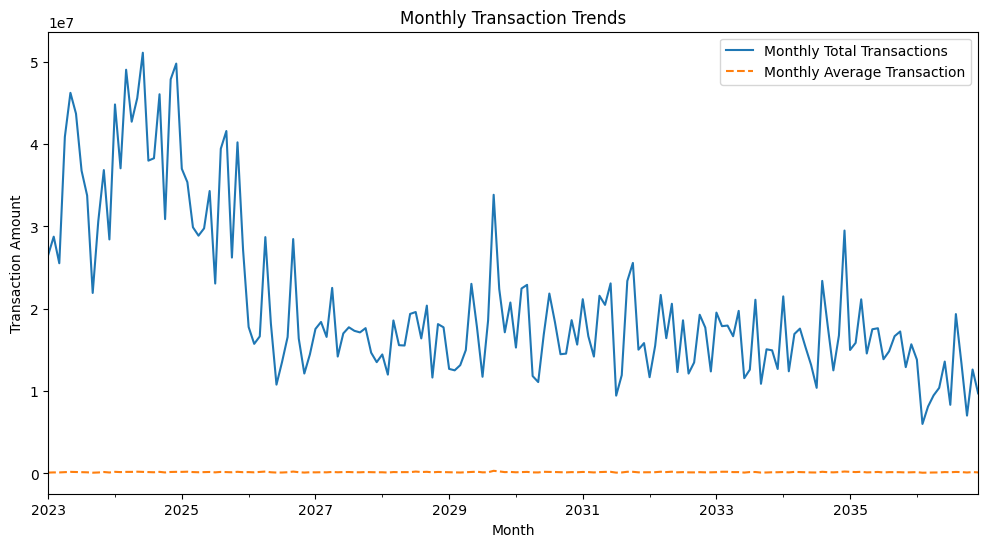

In [ ]:
import matplotlib.pyplot as plt
main_df['Transaction_DateTime'] = pd.to_datetime(main_df['Transaction_DateTime'])
main_df.set_index('Transaction_DateTime', inplace=True)
monthly_transactions = main_df['Amount'].resample('M').sum()
monthly_avg_transaction = main_df['Amount'].resample('M').mean()
plt.figure(figsize=(12, 6))
monthly_transactions.plot(label='Monthly Total Transactions')
monthly_avg_transaction.plot(label='Monthly Average Transaction', linestyle='--')
plt.title('Monthly Transaction Trends')
plt.xlabel('Month')
plt.ylabel('Transaction Amount')
plt.legend()
plt.show()


**Distributions and Skewness of Numerical Variables**

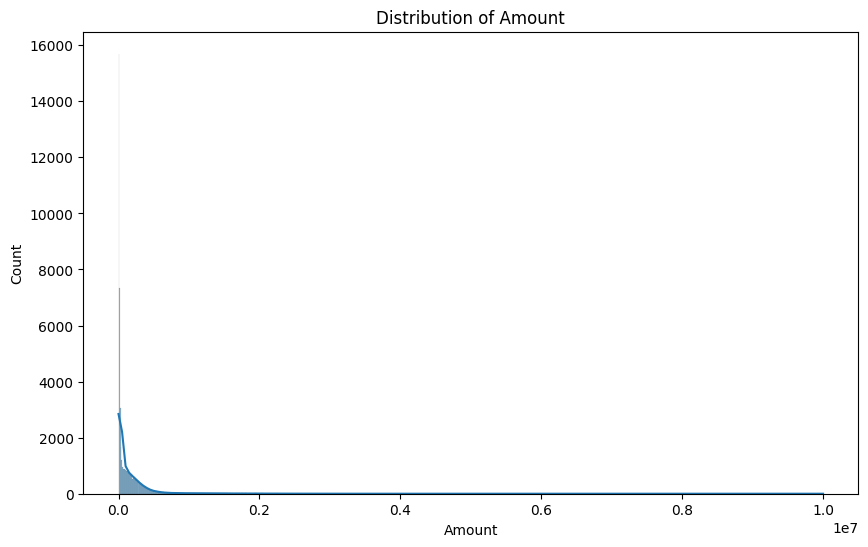

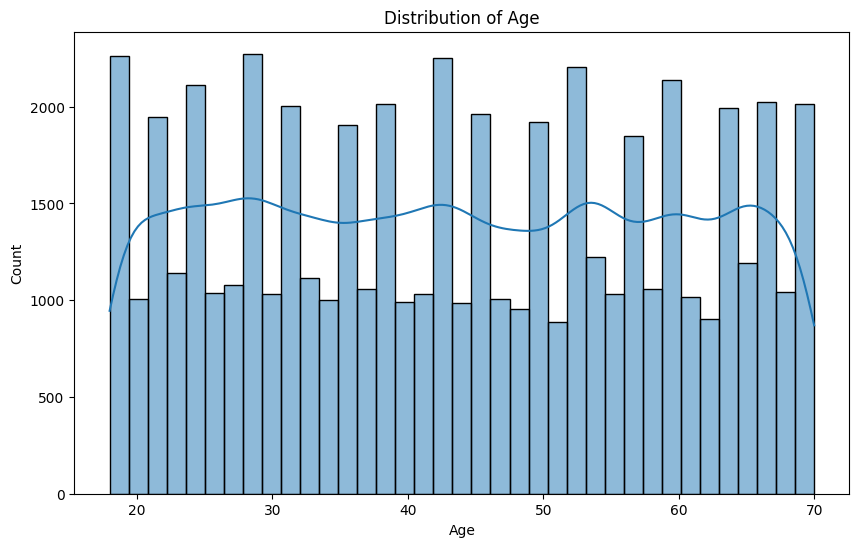

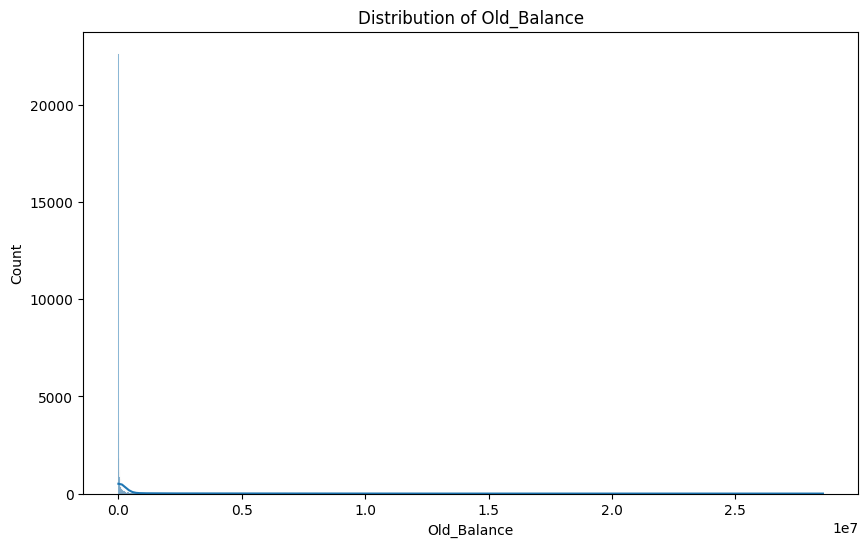

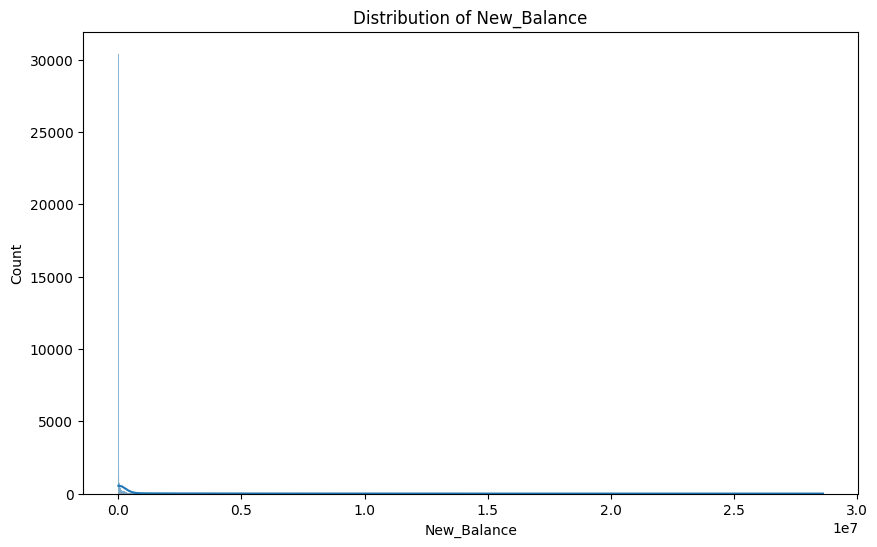

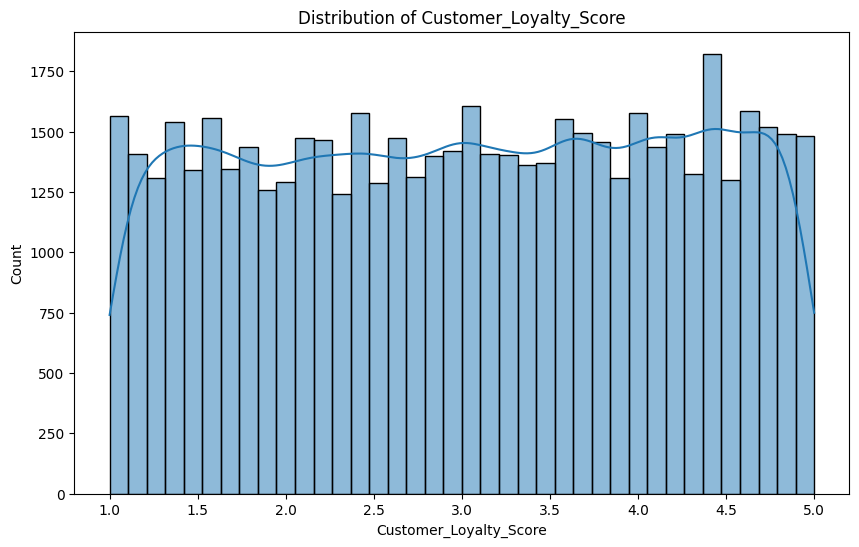

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
numerical_columns = ['Amount', 'Age', 'Old_Balance', 'New_Balance', 'Customer_Loyalty_Score']
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(main_df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

**Outliers Detection**

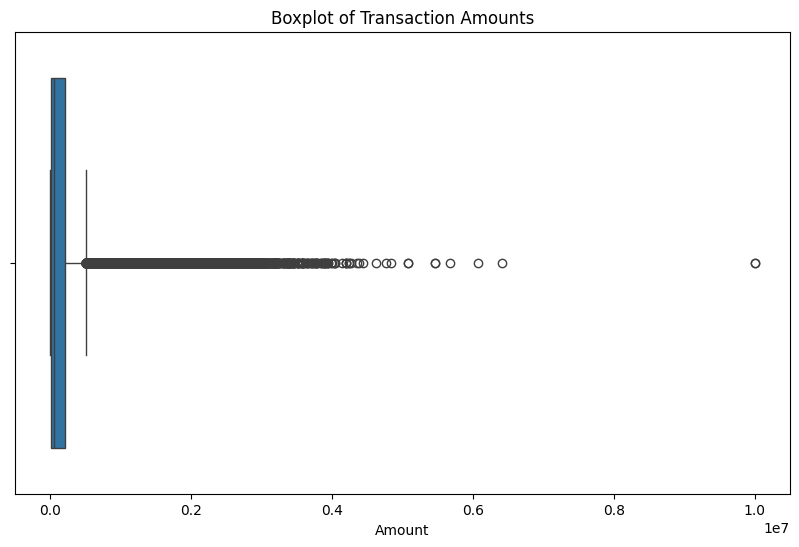

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=main_df['Amount'])
plt.title('Boxplot of Transaction Amounts')
plt.show()


**Bivariate Analysis (Exploring Relationships)**

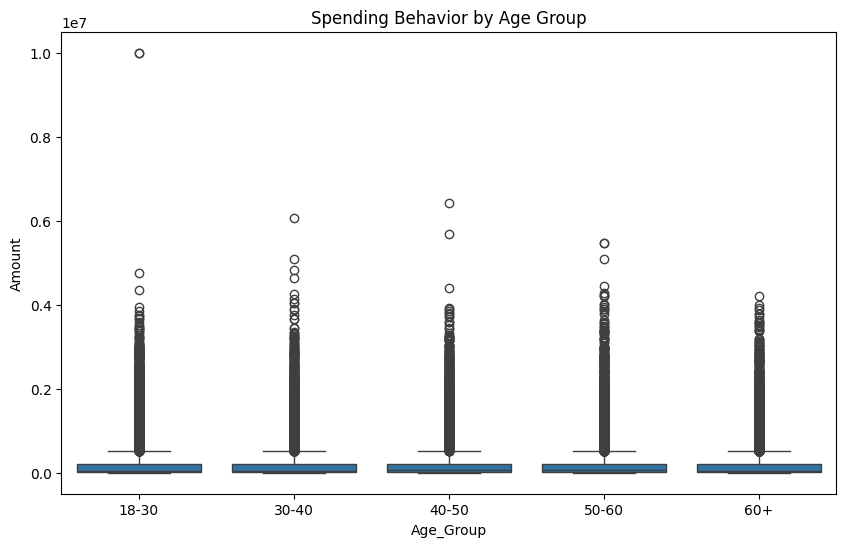

In [ ]:
main_df['Age_Group'] = pd.cut(main_df['Age'], bins=[18, 30, 40, 50, 60, 100], labels=['18-30', '30-40', '40-50', '50-60', '60+'])
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age_Group', y='Amount', data=main_df)
plt.title('Spending Behavior by Age Group')
plt.show()

**Customer Segmentation**

**Feature Engineering**

Recency, Frequency, Monetary (RFM) Analysis

In [ ]:
main_df['Transaction_DateTime'] = pd.to_datetime(main_df['Transaction_DateTime'], format='%d-%m-%Y %H:%M', dayfirst=True)
from datetime import datetime
today = datetime.now()
main_df['Recency'] = (today - main_df.groupby('Customer_ID')['Transaction_DateTime'].transform('max')).dt.days
main_df['Frequency'] = main_df.groupby('Customer_ID')['Transaction_ID'].transform('count')
main_df['Monetary'] = main_df.groupby('Customer_ID')['Amount'].transform('sum')
print(main_df[['Customer_ID', 'Recency', 'Frequency', 'Monetary']].head())

  Customer_ID  Recency  Frequency  Monetary
0      C07540     -227          4  12065.92
1      C07540     -227          4  12065.92
2      C07540     -227          4  12065.92
3      C07540     -227          4  12065.92
4      C05794    -4033          2  19485.85


**Advanced Clustering Techniques**

Gaussian Mixture Models (GMM) for Soft Clustering

In [ ]:
print(main_df[features].isnull().sum())


Recency      22467
Frequency        0
Monetary         0
dtype: int64


In [ ]:
main_df = main_df.dropna(subset=features)


In [ ]:
for feature in features:
    main_df[feature].fillna(main_df[feature].mean(), inplace=True)  # Replace NaN with mean


<ipython-input-44-ac6a5f8ed952>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  main_df[feature].fillna(main_df[feature].mean(), inplace=True)  # Replace NaN with mean


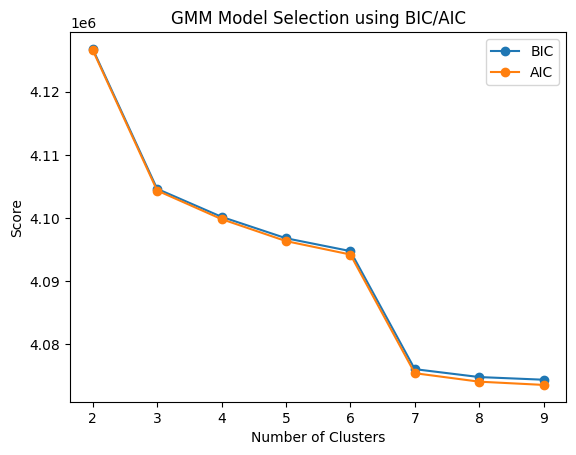

In [ ]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
features = ['Recency', 'Frequency', 'Monetary']
bic_scores = []
aic_scores = []
n_clusters_range = range(2, 10)
for n_clusters in n_clusters_range:
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm.fit(main_df[features])
    bic_scores.append(gmm.bic(main_df[features]))
    aic_scores.append(gmm.aic(main_df[features]))
plt.plot(n_clusters_range, bic_scores, label='BIC', marker='o')
plt.plot(n_clusters_range, aic_scores, label='AIC', marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.legend()
plt.title("GMM Model Selection using BIC/AIC")
plt.show()
optimal_gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = optimal_gmm.fit_predict(main_df[features])

main_df['GMM_Cluster'] = gmm_labels


**Hierarchical Clustering**

In [ ]:
print(main_df.columns)

Index(['Transaction_ID', 'Customer_ID', 'Transaction_DateTime',
       'Transaction_Type', 'Category', 'Merchant_ID', 'Merchant_Location',
       'Payment_Type', 'Age', 'Gender', 'Marital_Status', 'Location_Type',
       'Location_City', 'Life_Stage', 'Occupation', 'Household_Income',
       'Preferred_Language', 'Interests_Hobbies', 'Customer_Loyalty_Score',
       'Signup_Date', 'Review_ID', 'Category_Review', 'Review_Text',
       'Review_Rating', 'Amount', 'Old_Balance', 'New_Balance', 'IsFraud'],
      dtype='object')


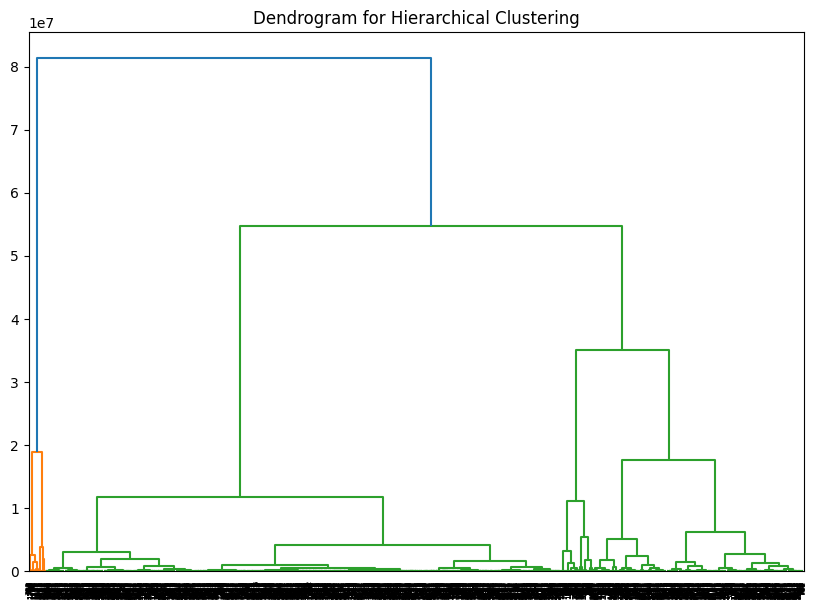

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
features = ['Recency', 'Frequency', 'Monetary']
hierarchical = AgglomerativeClustering(n_clusters=4, linkage='ward')
main_df['Hierarchical_Cluster'] = hierarchical.fit_predict(main_df[features])
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(main_df[features], method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.show()


**DBSCAN**

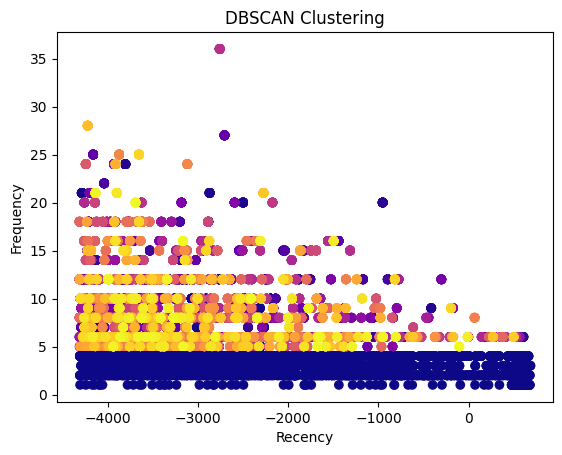

In [ ]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
features = ['Recency', 'Frequency', 'Monetary']
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(main_df[features])
main_df['DBSCAN_Cluster'] = dbscan_labels

plt.scatter(main_df['Recency'], main_df['Frequency'], c=dbscan_labels, cmap='plasma')
plt.title('DBSCAN Clustering')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()


  **K Means**

Silhouette Score for KMeans: 0.6709604679094378


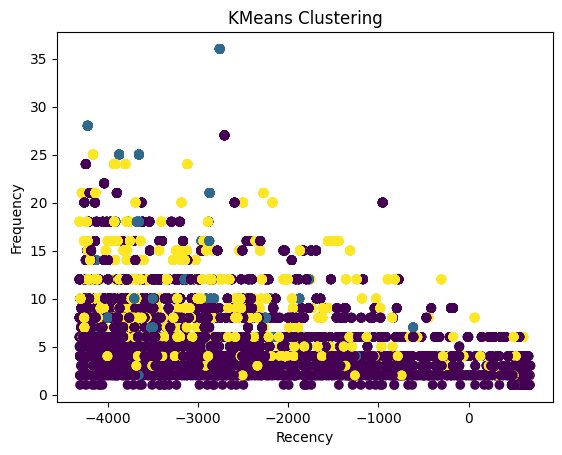

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
features = ['Recency', 'Frequency', 'Monetary']

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_labels = kmeans.fit_predict(main_df[features])

main_df['KMeans_Cluster'] = kmeans_labels

silhouette_kmeans = silhouette_score(main_df[features], kmeans_labels)
print(f"Silhouette Score for KMeans: {silhouette_kmeans}")

plt.scatter(main_df['Recency'], main_df['Frequency'], c=kmeans_labels, cmap='viridis')
plt.title('KMeans Clustering')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()


**Mean Shift**

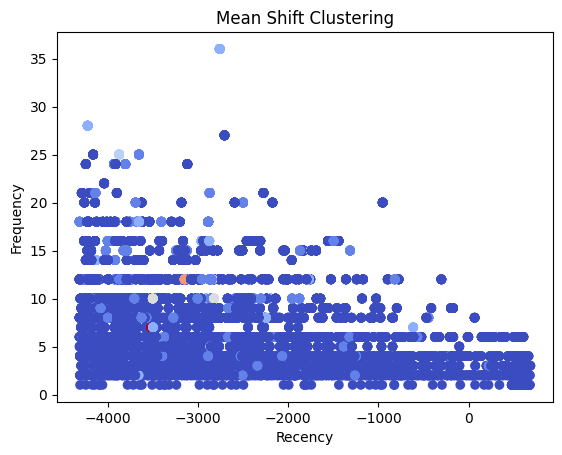

In [ ]:
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt
features = ['Recency', 'Frequency', 'Monetary']
mean_shift = MeanShift()
mean_shift_labels = mean_shift.fit_predict(main_df[features])
main_df['MeanShift_Cluster'] = mean_shift_labels
plt.scatter(main_df['Recency'], main_df['Frequency'], c=mean_shift_labels, cmap='coolwarm')
plt.title('Mean Shift Clustering')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()


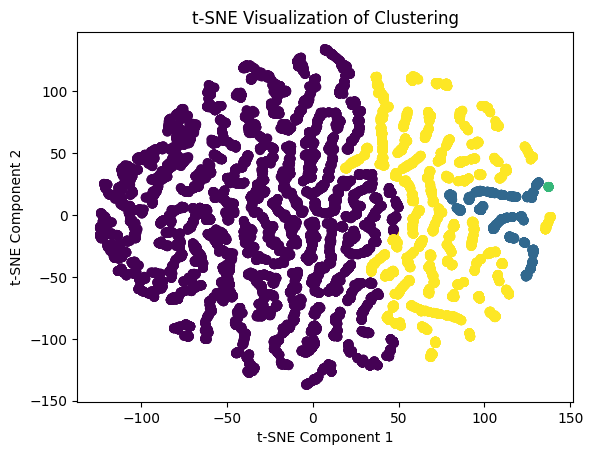

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(main_df[features])
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=main_df['KMeans_Cluster'], cmap='viridis')
plt.title('t-SNE Visualization of Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


**Model Validation and Interpretability**

Silhouette Score for Cluster Validation

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

features = ['Recency', 'Frequency', 'Monetary']

# KMeans Clustering
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_labels = kmeans.fit_predict(main_df[features])
silhouette_kmeans = silhouette_score(main_df[features], kmeans_labels)
print(f"Silhouette Score for KMeans: {silhouette_kmeans:.4f}")

# Agglomerative Clustering
hierarchical = AgglomerativeClustering(n_clusters=4, linkage='ward')
hierarchical_labels = hierarchical.fit_predict(main_df[features])
silhouette_hierarchical = silhouette_score(main_df[features], hierarchical_labels)
print(f"Silhouette Score for Agglomerative Clustering: {silhouette_hierarchical:.4f}")

# Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(main_df[features])
silhouette_gmm = silhouette_score(main_df[features], gmm_labels)
print(f"Silhouette Score for GMM: {silhouette_gmm:.4f}")

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(main_df[features])

# Exclude noise points in DBSCAN (label -1 represents noise)
valid_points = dbscan_labels != -1
silhouette_dbscan = silhouette_score(main_df[features][valid_points], dbscan_labels[valid_points])
print(f"Silhouette Score for DBSCAN (excluding noise): {silhouette_dbscan:.4f}")

# MeanShift Clustering
mean_shift = MeanShift()
mean_shift_labels = mean_shift.fit_predict(main_df[features])
silhouette_mean_shift = silhouette_score(main_df[features], mean_shift_labels)
print(f"Silhouette Score for MeanShift: {silhouette_mean_shift:.4f}")


Silhouette Score for KMeans: 0.6710
Silhouette Score for Agglomerative Clustering: 0.6704
Silhouette Score for GMM: 0.2575
Silhouette Score for DBSCAN (excluding noise): 1.0000
Silhouette Score for MeanShift: 0.6816


**Advanced Behavioral Analysis**

**Churn Prediction Analysis**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

main_df['Churn'] = main_df['Recency'] > threshold_value
X = main_df[['Recency', 'Frequency', 'Monetary', 'Customer_Loyalty_Score']]
y = main_df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n {classification_report(y_test, y_pred)}")


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00      1124
        True       1.00      1.00      1.00        45

    accuracy                           1.00      1169
   macro avg       1.00      1.00      1.00      1169
weighted avg       1.00      1.00      1.00      1169



**Advanced Profiling with Demographic and Behavioral Insights**



In [ ]:
from sklearn.cluster import KMeans

features = ['Recency', 'Frequency', 'Monetary', 'Age', 'Household_Income']


kmeans = KMeans(n_clusters=4, random_state=42)
main_df['Customer_Segment'] = kmeans.fit_predict(main_df[features])

cluster_profile = main_df.groupby('Customer_Segment').agg({
    'Recency': ['mean', 'std'],
    'Frequency': ['mean', 'std'],
    'Monetary': ['mean', 'std'],
    'Age': ['mean', 'std'],
    'Household_Income': ['mean', 'std'],
    'Amount': ['mean', 'sum'],
}).reset_index()

print(cluster_profile)


  Customer_Segment      Recency               Frequency            \
                           mean          std       mean       std   
0                0 -2906.707323  1161.238413   5.113344  3.305108   
1                1 -3473.208987   784.159628  15.994294  7.899708   
2                2 -3212.942360   941.491675   8.977290  4.289006   
3                3 -3353.471769   868.883535  13.018136  7.186522   

       Monetary                      Age            Household_Income  \
           mean           std       mean        std             mean   
0  4.068872e+05  3.161338e+05  44.270759  15.388670     89727.222807   
1  8.499847e+06  2.657534e+06  41.447218  14.945645     91135.432240   
2  1.760746e+06  4.996220e+05  43.722627  15.417753     89502.135847   
3  4.114321e+06  8.853562e+05  43.678757  14.765148     90356.730867   

                        Amount                
            std           mean           sum  
0  34649.916706   95778.178535  6.095994e+09  
1  32295.34

**Behavioral Analysis Based on Spending**

In [ ]:
# Categorize customers based on spending (Monetary)
main_df['Spending_Bracket'] = pd.qcut(main_df['Monetary'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

# Profiling spending brackets
spending_profile = main_df.groupby('Spending_Bracket').agg({
    'Recency': ['mean', 'std'],
    'Frequency': ['mean', 'std'],
    'Monetary': ['mean', 'std'],
    'Amount': ['mean', 'sum'],
    'Age': ['mean', 'std'],
    'Household_Income': ['mean', 'std'],
}).reset_index()

print(spending_profile)


  Spending_Bracket      Recency               Frequency            \
                           mean          std       mean       std   
0              Low -2496.027721  1373.858640   4.702259  2.298767   
1           Medium -2817.823289  1197.301257   7.631256  3.938936   
2             High -2910.622951  1129.349195   8.924180  5.807015   
3        Very High -3111.224405  1100.637846  11.132368  5.283187   

       Monetary                       Amount                      Age  \
           mean           std           mean           sum       mean   
0  3.242072e+04  1.966865e+04    7171.042433  6.984595e+06  42.502053   
1  1.788041e+05  7.395194e+04   34219.172597  3.346635e+07  43.613892   
2  5.951547e+05  1.864738e+05   99126.955143  9.674791e+07  43.882172   
3  2.274253e+06  1.722439e+06  251795.864043  2.434866e+08  42.971044   

             Household_Income                
         std             mean           std  
0  14.729542     88457.320329  34620.072770  
1  16.01

<ipython-input-29-a62992a8bc8b>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  spending_profile = main_df.groupby('Spending_Bracket').agg({


# **FRAUD DETECTION USING**



*  *LOGISTIC REGRESSION*
*  *RANDOM FOREST*
*  *DECISION TREE CLASSIFIER*
*  *XGB CLASSIFER*
*  *KNN CLASSIFIER*
*  *GAUSSIAN NAIVE BAYES CLASSIFIER*






The columns - Old_Balance, New_Balance, Transaction_Type, Is_Fraud will be helpful in this task of fraud detection.

Data Preprocessing & Preparing Dataset

In [ ]:
main_df.isna().sum()

,0
Transaction_ID,0
Customer_ID,0
Transaction_DateTime,0
Transaction_Type,0
Category,0
Merchant_ID,0
Merchant_Location,0
Payment_Type,0
Age,0
Gender,0


In [ ]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99916 entries, 0 to 99915
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Transaction_ID          99916 non-null  object 
 1   Customer_ID             99916 non-null  object 
 2   Transaction_DateTime    99916 non-null  object 
 3   Transaction_Type        99916 non-null  object 
 4   Category                99916 non-null  object 
 5   Merchant_ID             99916 non-null  object 
 6   Merchant_Location       99916 non-null  object 
 7   Payment_Type            99916 non-null  object 
 8   Age                     99916 non-null  int64  
 9   Gender                  99916 non-null  object 
 10  Marital_Status          99916 non-null  object 
 11  Location_Type           99916 non-null  object 
 12  Location_City           99916 non-null  object 
 13  Life_Stage              99916 non-null  object 
 14  Occupation              99916 non-null

In [ ]:
main_df.describe()

,Age,Household_Income,Customer_Loyalty_Score,Review_Rating,Amount,Old_Balance,New_Balance,IsFraud
count,99916.000000,99916.000000,99916.000000,99916.000000,9.991600e+04,9.991600e+04,9.991600e+04,99916.000000
mean,44.036230,89739.178430,3.000739,2.992824,1.735451e+05,8.783195e+05,8.946412e+05,0.001161
std,15.344828,34677.009513,1.161590,1.416518,3.441672e+05,2.674280e+06,2.712327e+06,0.034053
min,18.000000,30003.000000,1.000000,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000
25%,31.000000,59428.000000,1.990000,2.000000,9.963870e+03,0.000000e+00,0.000000e+00,0.000000
50%,44.000000,90195.000000,3.000000,3.000000,5.272263e+04,2.005450e+04,0.000000e+00,0.000000
75%,57.000000,119560.250000,4.020000,4.000000,2.117430e+05,1.903080e+05,2.148844e+05,0.000000
max,70.000000,150000.000000,5.000000,5.000000,1.000000e+07,3.379739e+07,3.400874e+07,1.000000


In [ ]:
df = main_df.copy()

Dropping irrelevant attributes for detecting fraud

In [ ]:
df.drop(['Transaction_ID', 'Customer_ID', 'Transaction_DateTime', 'Merchant_ID', 'Merchant_Location', 'Payment_Type', 'Age', 'Gender', 'Marital_Status', 'Location_Type',
'Location_City', 'Occupation', 'Household_Income','Life_Stage','Preferred_Language', 'Interests_Hobbies', 'Customer_Loyalty_Score', 'Signup_Date', 'Review_ID', 'Category_Review', 'Review_Text', 'Review_Rating'], axis=1, inplace=True)

In [ ]:
df.head()

,Transaction_Type,Category,Amount,Old_Balance,New_Balance,IsFraud
0,PAYMENT,Technology,9839.64,170136.0,160296.36,0
1,PAYMENT,Technology,1864.28,21249.0,19384.72,0
2,CASH-IN,Health,181.00,181.0,0.00,1
3,CASH-IN,Health,181.00,181.0,0.00,1
4,DEBIT,Health,11668.14,41554.0,29885.86,0


One Hot Encoding

In [ ]:
df['Category'] = df['Category'].astype(str)
df['Transaction_Type'] = df['Transaction_Type'].astype(str)
df = pd.get_dummies(df, columns=['Category', 'Transaction_Type'], prefix=['Category', 'Transaction_Type'], drop_first=False)

In [ ]:
df.head()

,Amount,Old_Balance,New_Balance,IsFraud,Category_Food,Category_Health,Category_Shopping,Category_Technology,Category_Travel,Transaction_Type_CASH-IN,Transaction_Type_CASH-OUT,Transaction_Type_DEBIT,Transaction_Type_PAYMENT,Transaction_Type_TRANSFER
0,9839.64,170136.0,160296.36,0,False,False,False,True,False,False,False,False,True,False
1,1864.28,21249.0,19384.72,0,False,False,False,True,False,False,False,False,True,False
2,181.00,181.0,0.00,1,False,True,False,False,False,True,False,False,False,False
3,181.00,181.0,0.00,1,False,True,False,False,False,True,False,False,False,False
4,11668.14,41554.0,29885.86,0,False,True,False,False,False,False,False,True,False,False


In [ ]:
bool_columns = ['Category_Food', 'Category_Health', 'Category_Shopping', 'Category_Technology', 'Category_Travel',
                'Transaction_Type_CASH-IN', 'Transaction_Type_CASH-OUT', 'Transaction_Type_DEBIT',
                'Transaction_Type_PAYMENT', 'Transaction_Type_TRANSFER']

df[bool_columns] = df[bool_columns].astype(int)

In [ ]:
df.head()

,Amount,Old_Balance,New_Balance,IsFraud,Category_Food,Category_Health,Category_Shopping,Category_Technology,Category_Travel,Transaction_Type_CASH-IN,Transaction_Type_CASH-OUT,Transaction_Type_DEBIT,Transaction_Type_PAYMENT,Transaction_Type_TRANSFER
0,9839.64,170136.0,160296.36,0,0,0,0,1,0,0,0,0,1,0
1,1864.28,21249.0,19384.72,0,0,0,0,1,0,0,0,0,1,0
2,181.00,181.0,0.00,1,0,1,0,0,0,1,0,0,0,0
3,181.00,181.0,0.00,1,0,1,0,0,0,1,0,0,0,0
4,11668.14,41554.0,29885.86,0,0,1,0,0,0,0,0,1,0,0


In [ ]:
X = df.drop('IsFraud', axis =1)
y = df['IsFraud']
X.shape, y.shape

((99916, 13), (99916,))

**Normalizing Amount, Old_Balance, New_Balance attributes using MinMaxScaler**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import MinMaxScaler
standard = MinMaxScaler()
amount = df['Amount'].values
old_balance = df['Old_Balance'].values
new_balance = df['New_Balance'].values
df['Amount'] = standard.fit_transform(amount.reshape(-1,1))
df['Old_Balance'] = standard.fit_transform(old_balance.reshape(-1,1))
df['New_Balance'] = standard.fit_transform(new_balance.reshape(-1,1))
X_scaled = df.drop('IsFraud', axis=1)
y_scaled = df['IsFraud']
X_scaled.shape, y_scaled.shape

((99916, 13), (99916,))

In [ ]:
df.head()

,Amount,Old_Balance,New_Balance,IsFraud,Category_Food,Category_Health,Category_Shopping,Category_Technology,Category_Travel,Transaction_Type_CASH-IN,Transaction_Type_CASH-OUT,Transaction_Type_DEBIT,Transaction_Type_PAYMENT,Transaction_Type_TRANSFER
0,0.000984,0.005034,0.004713,0,0,0,0,1,0,0,0,0,1,0
1,0.000186,0.000629,0.000570,0,0,0,0,1,0,0,0,0,1,0
2,0.000018,0.000005,0.000000,1,0,1,0,0,0,1,0,0,0,0
3,0.000018,0.000005,0.000000,1,0,1,0,0,0,1,0,0,0,0
4,0.001167,0.001230,0.000879,0,0,1,0,0,0,0,0,1,0,0


**EDA & VISUALIZATION**

In [ ]:
class_count_df = pd.DataFrame(main_df['IsFraud'].value_counts().rename_axis('Class').reset_index(name='Counts'))
class_count_df['Class'].replace({0:'Normal',
                                 1:'Fraudulent'}, inplace=True)
class_count_df.head()

<ipython-input-215-f5143d1f640a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  class_count_df['Class'].replace({0:'Normal',


,Class,Counts
0,Normal,99800
1,Fraudulent,116


This is a highly imbalanced dataset beacause the number of fraudulent transactions are just 116 in comparision to 99800 normal transactions

<ipython-input-216-e22003b31caa>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=list(class_count_df['Class']) ,c='blue', rotation=0, fontsize=10, fontweight='bold')
<ipython-input-216-e22003b31caa>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels=labels.astype(int), c='blue', fontsize=8, fontweight='bold')


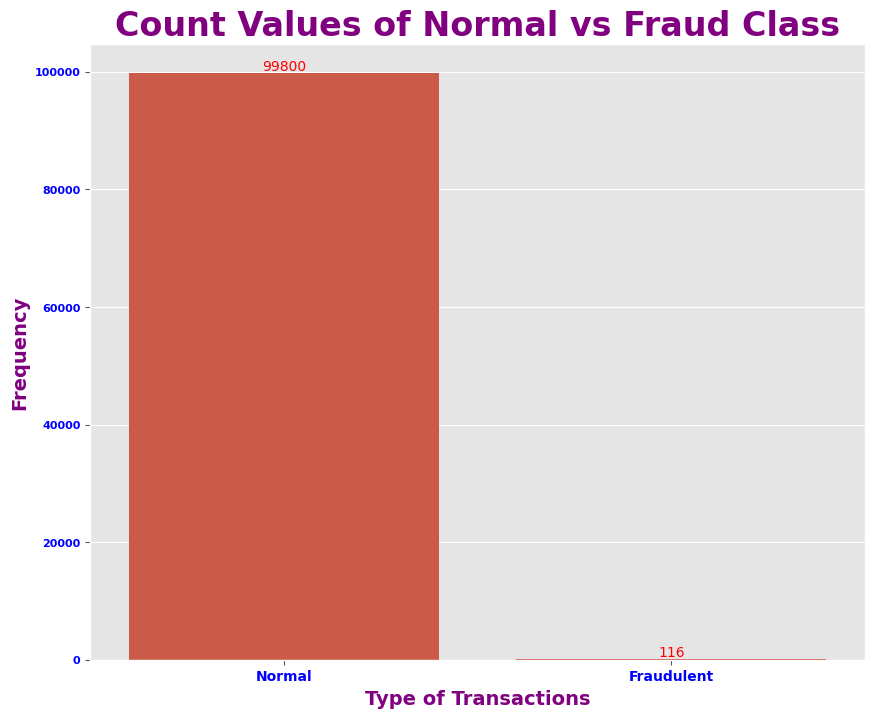

In [ ]:
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(10)

ax = sns.barplot(x=class_count_df['Class'],
                 y=class_count_df['Counts'])

ax.bar_label(ax.containers[0], color='red')

ax.set_xticklabels(labels=list(class_count_df['Class']) ,c='blue', rotation=0, fontsize=10, fontweight='bold')
labels, location = plt.yticks()
ax.set_yticklabels(labels=labels.astype(int), c='blue', fontsize=8, fontweight='bold')

plt.xlabel(xlabel='Type of Transactions', fontsize=14, fontweight='bold').set_color('purple')
plt.ylabel(ylabel='Frequency', fontsize=14, fontweight='bold').set_color('purple')
plt.title(label='Count Values of Normal vs Fraud Class', fontsize=24, fontweight='bold').set_color('purple')

*No. of frauds and normal transactions in the dataset*

In [ ]:
fraud = main_df[main_df['IsFraud'] == 1]
normal = main_df[main_df['IsFraud'] == 0]
fraud.shape, normal.shape

((116, 28), (99800, 28))

*Frequency of Frauds*

In [ ]:
fraud_frc = len(fraud)/float(len(main_df))
fraud_frc

0.0011609752191841147

In [ ]:
print(f"Percentage of Fraud Transactions in dataset : {fraud_frc*100:.2f}%")

Percentage of Fraud Transactions in dataset : 0.12%


In [ ]:
fraud.Amount.describe()

,Amount
count,1.160000e+02
mean,5.415784e+05
std,1.535067e+06
min,1.640000e+02
25%,1.724600e+04
50%,3.907782e+04
75%,2.961546e+05
max,1.000000e+07


In [ ]:
fraud.Old_Balance.describe()

,Old_Balance
count,1.160000e+02
mean,5.527101e+05
std,1.710291e+06
min,0.000000e+00
25%,1.370633e+04
50%,3.052102e+04
75%,2.486596e+05
max,1.293042e+07


In [ ]:
fraud.New_Balance.describe()

,New_Balance
count,1.160000e+02
mean,2.908048e+04
std,2.748190e+05
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,2.930418e+06


In [ ]:
normal.Amount.describe()

,Amount
count,9.980000e+04
mean,1.731174e+05
std,3.401702e+05
min,3.200000e-01
25%,9.954067e+03
50%,5.273450e+04
75%,2.116584e+05
max,6.419835e+06


In [ ]:
normal.Old_Balance.describe()

,Old_Balance
count,9.980000e+04
mean,8.786980e+05
std,2.675181e+06
min,0.000000e+00
25%,0.000000e+00
50%,2.004450e+04
75%,1.901433e+05
max,3.379739e+07


In [ ]:
normal.New_Balance.describe()

,New_Balance
count,9.980000e+04
mean,8.956472e+05
std,2.713726e+06
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,2.154187e+05
max,3.400874e+07


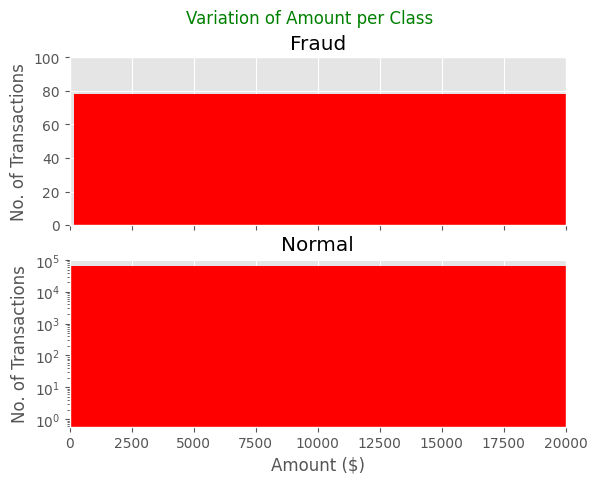

In [ ]:
fig, (ax0, ax1) = plt.subplots(nrows=2,
                               ncols=1,
                               sharex=True)
fig.suptitle("Variation of Amount per Class", color='green')
bins=50
ax0.hist(fraud['Amount'], bins=bins, color='red')
ax0.set_title('Fraud')
ax0.set_ylim(0, 100)
ax0.set_ylabel('No. of Transactions')

ax1.hist(normal['Amount'], bins=bins, color='red')
ax1.set_title('Normal')
ax1.set_ylabel('No. of Transactions')

plt.xlim(0, 20000)
plt.xlabel('Amount ($)')
plt.yscale('log')

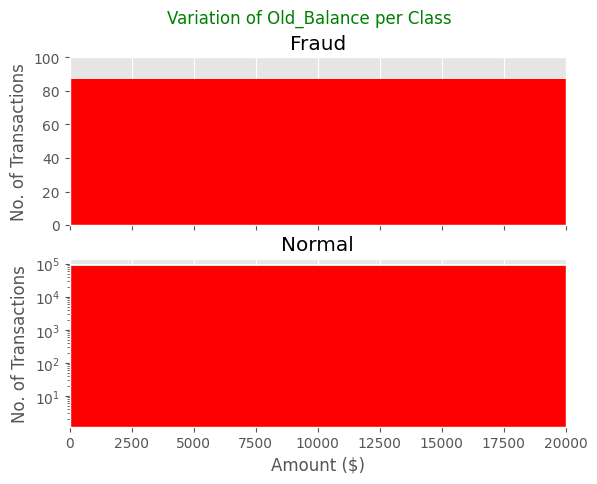

In [ ]:
fig, (ax0, ax1) = plt.subplots(nrows=2,
                               ncols=1,
                               sharex=True)
fig.suptitle("Variation of Old_Balance per Class", color='green')
bins=50
ax0.hist(fraud['Old_Balance'], bins=bins, color='red')
ax0.set_title('Fraud')
ax0.set_ylim(0, 100)
ax0.set_ylabel('No. of Transactions')

ax1.hist(normal['Old_Balance'], bins=bins, color='red')
ax1.set_title('Normal')
ax1.set_ylabel('No. of Transactions')

plt.xlim(0, 20000)
plt.xlabel('Amount ($)')
plt.yscale('log')

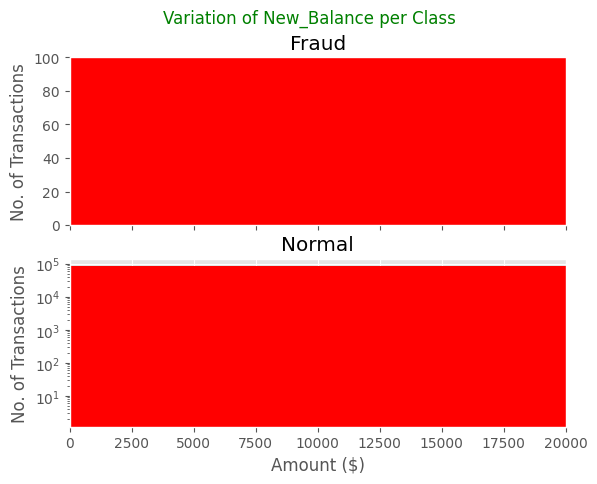

In [ ]:
fig, (ax0, ax1) = plt.subplots(nrows=2,
                               ncols=1,
                               sharex=True)
fig.suptitle("Variation of New_Balance per Class", color='green')
bins=50
ax0.hist(fraud['New_Balance'], bins=bins, color='red')
ax0.set_title('Fraud')
ax0.set_ylim(0, 100)
ax0.set_ylabel('No. of Transactions')

ax1.hist(normal['New_Balance'], bins=bins, color='red')
ax1.set_title('Normal')
ax1.set_ylabel('No. of Transactions')

plt.xlim(0, 20000)
plt.xlabel('Amount ($)')
plt.yscale('log')

Handling the Imbalanced Dataset Using SMOTE (Synthetic Minority Oversampling Technique)

In [ ]:
main_df.IsFraud.value_counts()

,count
IsFraud,
0,99800
1,116


In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority', random_state=42)
X_smote, y_smote = sm.fit_resample(df.drop('IsFraud', axis=1), df['IsFraud'])
smote_df = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)
X_smote.shape

(199600, 13)

In [ ]:
X_smote.shape

(199600, 13)

In [ ]:
smote_df.IsFraud.value_counts()

,count
IsFraud,
0,99800
1,99800


**Logistic Regression**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [ ]:
def LR_model(X,y):
    print("Spliting Datasets....")
    from sklearn.model_selection import train_test_split
    np.random.seed(42)
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
    print("Successfully splitted!!!")

    print("Model Fitting.....")
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    print("Successfully model fitted!!!")

    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
    print("------------Training Prediction--------------")
    y_preds = lr.predict(X_train)
    print(f"Classfifcation Report:\n\n{classification_report(y_train, y_preds)}\n\n")

    cf_matrix = confusion_matrix(y_train, y_preds)

    fig, ax = plt.subplots(figsize=(6,4))
    sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
    fig.suptitle(t="Confusion Matrix",
                 color="orange",
                 fontsize=16);
    ax.set(xlabel="Predicted Label",
           ylabel="Actual Label");

    print(f"Accuracy Score:\n\n{accuracy_score(y_train, y_preds)*100:2f}%\n")

    print("------------Test Prediction--------------")

    y_preds =lr.predict(X_test)
    print(f"Classfifcation Report:\n\n{classification_report(y_test, y_preds)}\n\n")

    cf_matrix = confusion_matrix(y_test, y_preds)

    fig, ax = plt.subplots(figsize=(6,4))
    sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
    fig.suptitle(t="Confusion Matrix",
                 color="orange",
                 fontsize=16);
    ax.set(xlabel="Predicted Label",
           ylabel="Actual Label");

    print(f"Accuracy Score:\n\n{accuracy_score(y_test, y_preds)*100:2f}%\n")

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.72      0.81      0.76     79874
           1       0.78      0.68      0.73     79806

    accuracy                           0.75    159680
   macro avg       0.75      0.75      0.74    159680
weighted avg       0.75      0.75      0.74    159680



Accuracy Score:

74.528432%

------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.71      0.81      0.76     19926
           1       0.78      0.67      0.72     19994

    accuracy                           0.74     39920
   macro avg       0.75      0.74      0.74     39920
weighted avg       0.75      0.74      0.74     39920



Accuracy Score:

74.210922%



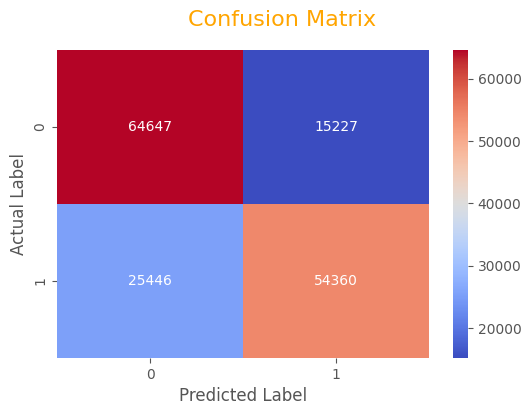

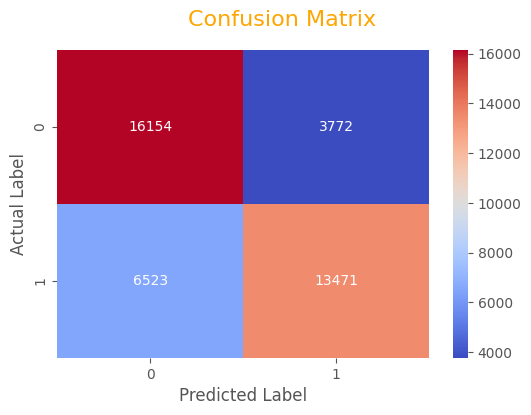

In [ ]:
LR_model(X_smote, y_smote)

**RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
def RF_model(X,y):
    print("Spliting Datasets....")
    from sklearn.model_selection import train_test_split
    np.random.seed(42)
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
    print("Successfully splitted!!!")

    print("Model Fitting.....")
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    print("Successfully model fitted!!!")

    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
    print("------------Training Prediction--------------")
    y_preds = rf.predict(X_train)
    print(f"Classfifcation Report:\n\n{classification_report(y_train, y_preds)}\n\n")

    cf_matrix = confusion_matrix(y_train, y_preds)

    fig, ax = plt.subplots(figsize=(6,4))
    sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
    fig.suptitle(t="Confusion Matrix of Training Datasets",
                 color="orange",
                 fontsize=16);
    ax.set(xlabel="Predicted Label",
           ylabel="Actual Label");

    print(f"Accuracy Score:\n\n{accuracy_score(y_train, y_preds)*100:2f}%\n")

    print("------------Test Prediction--------------")

    y_preds = rf.predict(X_test)
    print(f"Classfifcation Report:\n\n{classification_report(y_test, y_preds)}\n\n")

    cf_matrix = confusion_matrix(y_test, y_preds)

    fig, ax = plt.subplots(figsize=(6,4))
    sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
    fig.suptitle(t="Confusion Matrix of Testing Datasets",
                 color="orange",
                 fontsize=16);
    ax.set(xlabel="Predicted Label",
           ylabel="Actual Label");

    print(f"Accuracy Score:\n\n{accuracy_score(y_test, y_preds)*100:2f}%\n")

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     79874
           1       1.00      1.00      1.00     79806

    accuracy                           1.00    159680
   macro avg       1.00      1.00      1.00    159680
weighted avg       1.00      1.00      1.00    159680



Accuracy Score:

100.000000%

------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     19926
           1       0.99      1.00      0.99     19994

    accuracy                           0.99     39920
   macro avg       0.99      0.99      0.99     39920
weighted avg       0.99      0.99      0.99     39920



Accuracy Score:

99.408818%



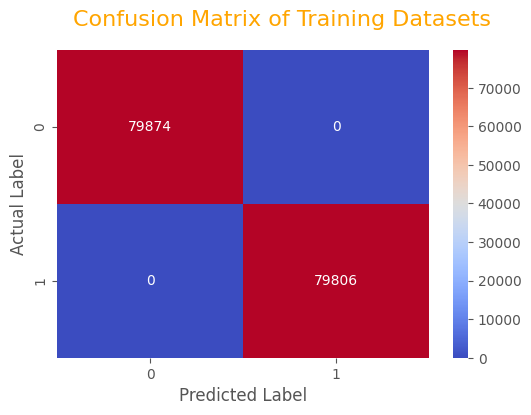

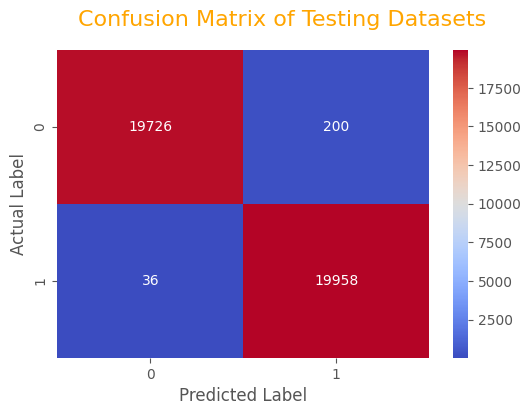

In [ ]:
RF_model(X_smote, y_smote)

**DECISION TREE CLASSIFIER**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
def DT_model(X,y):
    print("Spliting Datasets....")
    from sklearn.model_selection import train_test_split
    np.random.seed(42)
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
    print("Successfully splitted!!!")

    print("Model Fitting.....")
    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train)
    print("Successfully model fitted!!!")

    print("------------Training Prediction--------------")
    y_preds = dt.predict(X_train)
    print(f"Classfifcation Report:\n\n{classification_report(y_train, y_preds)}\n\n")

    cf_matrix = confusion_matrix(y_train, y_preds)

    fig, ax = plt.subplots(figsize=(6,4))
    sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
    fig.suptitle(t="Confusion Matrix",
                 color="orange",
                 fontsize=16);
    ax.set(xlabel="Predicted Label",
           ylabel="Actual Label");

    print(f"Accuracy Score:\n\n{accuracy_score(y_train, y_preds)*100:2f}%\n")

    print("------------Test Prediction--------------")

    y_preds = dt.predict(X_test)
    print(f"Classfifcation Report:\n\n{classification_report(y_test, y_preds)}\n\n")

    cf_matrix = confusion_matrix(y_test, y_preds)

    fig, ax = plt.subplots(figsize=(6,4))
    sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
    fig.suptitle(t="Confusion Matrix",
                 color="orange",
                 fontsize=16);
    ax.set(xlabel="Predicted Label",
           ylabel="Actual Label");

    print(f"Accuracy Score:\n\n{accuracy_score(y_test, y_preds)*100:2f}%\n")

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     79874
           1       1.00      1.00      1.00     79806

    accuracy                           1.00    159680
   macro avg       1.00      1.00      1.00    159680
weighted avg       1.00      1.00      1.00    159680



Accuracy Score:

100.000000%

------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     19926
           1       0.99      1.00      0.99     19994

    accuracy                           0.99     39920
   macro avg       0.99      0.99      0.99     39920
weighted avg       0.99      0.99      0.99     39920



Accuracy Score:

99.451403%



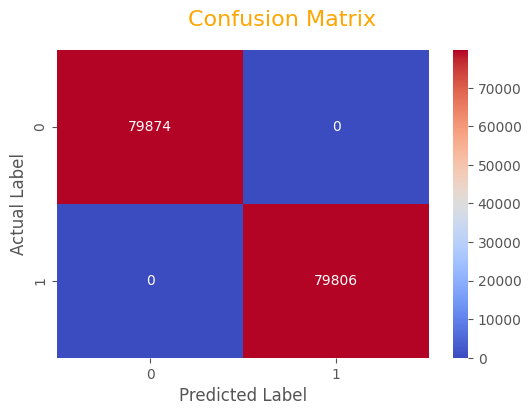

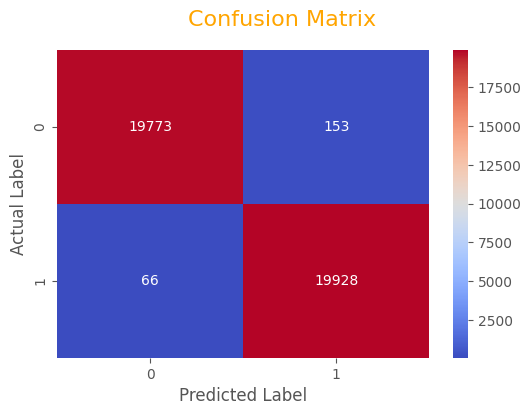

In [ ]:
DT_model(X_smote, y_smote)

**XG Boost model**

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
def XGB_model(X,y):
    print("Spliting Datasets....")
    from sklearn.model_selection import train_test_split
    np.random.seed(42)
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
    print("Successfully splitted!!!")

    print("Model Fitting.....")
    xgb = XGBClassifier()
    xgb.fit(X_train, y_train)
    print("Successfully model fitted!!!")

    print("------------Training Prediction--------------")
    y_preds = xgb.predict(X_train)
    print(f"Classfifcation Report:\n\n{classification_report(y_train, y_preds)}\n\n")

    cf_matrix = confusion_matrix(y_train, y_preds)

    fig, ax = plt.subplots(figsize=(6,4))
    sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
    fig.suptitle(t="Confusion Matrix",
                 color="orange",
                 fontsize=16);
    ax.set(xlabel="Predicted Label",
           ylabel="Actual Label");

    print(f"Accuracy Score:\n\n{accuracy_score(y_train, y_preds)*100:2f}%\n")

    print("------------Test Prediction--------------")

    y_preds = xgb.predict(X_test)
    print(f"Classfifcation Report:\n\n{classification_report(y_test, y_preds)}\n\n")

    cf_matrix = confusion_matrix(y_test, y_preds)

    fig, ax = plt.subplots(figsize=(6,4))
    sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
    fig.suptitle(t="Confusion Matrix",
                 color="orange",
                 fontsize=16);
    ax.set(xlabel="Predicted Label",
           ylabel="Actual Label");

    print(f"Accuracy Score:\n\n{accuracy_score(y_test, y_preds)*100:2f}%\n")

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     79874
           1       0.99      1.00      1.00     79806

    accuracy                           1.00    159680
   macro avg       1.00      1.00      1.00    159680
weighted avg       1.00      1.00      1.00    159680



Accuracy Score:

99.522796%

------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     19926
           1       0.99      1.00      0.99     19994

    accuracy                           0.99     39920
   macro avg       0.99      0.99      0.99     39920
weighted avg       0.99      0.99      0.99     39920



Accuracy Score:

99.328657%



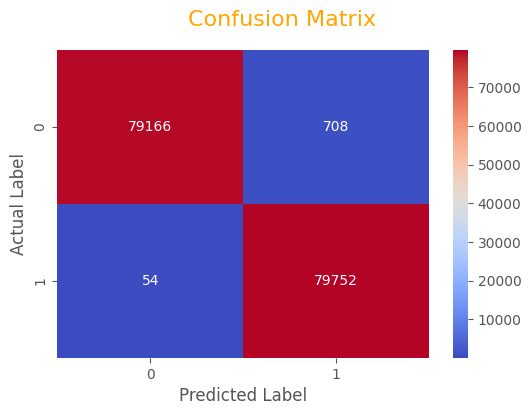

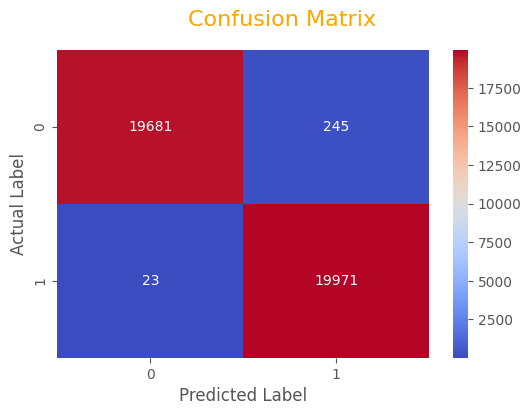

In [ ]:
XGB_model(X_smote, y_smote)

**K nearest Neighbours Classifer**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
def KN_model(X,y):
    print("Spliting Datasets....")
    from sklearn.model_selection import train_test_split
    np.random.seed(42)
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
    print("Successfully splitted!!!")

    print("Model Fitting.....")
    kn = KNeighborsClassifier()
    kn.fit(X_train, y_train)
    print("Successfully model fitted!!!")

    print("------------Training Prediction--------------")
    y_preds = kn.predict(X_train)
    print(f"Classfifcation Report:\n\n{classification_report(y_train, y_preds)}\n\n")

    cf_matrix = confusion_matrix(y_train, y_preds)

    fig, ax = plt.subplots(figsize=(6,4))
    sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
    fig.suptitle(t="Confusion Matrix",
                 color="orange",
                 fontsize=16);
    ax.set(xlabel="Predicted Label",
           ylabel="Actual Label");

    print(f"Accuracy Score:\n\n{accuracy_score(y_train, y_preds)*100:2f}%\n")

    print("------------Test Prediction--------------")

    y_preds =kn.predict(X_test)
    print(f"Classfifcation Report:\n\n{classification_report(y_test, y_preds)}\n\n")

    cf_matrix = confusion_matrix(y_test, y_preds)

    fig, ax = plt.subplots(figsize=(6,4))
    sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
    fig.suptitle(t="Confusion Matrix",
                 color="orange",
                 fontsize=16);
    ax.set(xlabel="Predicted Label",
           ylabel="Actual Label");

    print(f"Accuracy Score:\n\n{accuracy_score(y_test, y_preds)*100:2f}%\n")

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     79874
           1       0.98      1.00      0.99     79806

    accuracy                           0.99    159680
   macro avg       0.99      0.99      0.99    159680
weighted avg       0.99      0.99      0.99    159680



Accuracy Score:

99.000501%

------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     19926
           1       0.98      1.00      0.99     19994

    accuracy                           0.99     39920
   macro avg       0.99      0.99      0.99     39920
weighted avg       0.99      0.99      0.99     39920



Accuracy Score:

98.637275%



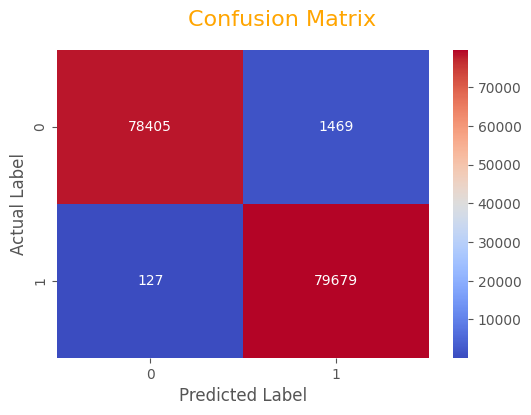

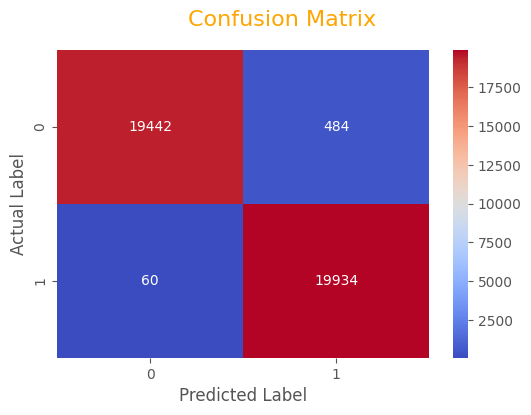

In [ ]:
KN_model(X_smote, y_smote)

**Gaussian Naive Bayes Classifier**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
def GNB_model(X,y):
    print("Spliting Datasets....")
    from sklearn.model_selection import train_test_split
    np.random.seed(42)
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
    print("Successfully splitted!!!")

    print("Model Fitting.....")
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    print("Successfully model fitted!!!")

    print("------------Training Prediction--------------")
    y_preds = gnb.predict(X_train)
    print(f"Classfifcation Report:\n\n{classification_report(y_train, y_preds)}\n\n")

    cf_matrix = confusion_matrix(y_train, y_preds)

    fig, ax = plt.subplots(figsize=(6,4))
    sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
    fig.suptitle(t="Confusion Matrix",
                 color="orange",
                 fontsize=16);
    ax.set(xlabel="Predicted Label",
           ylabel="Actual Label");

    print(f"Accuracy Score:\n\n{accuracy_score(y_train, y_preds)*100:2f}%\n")

    print("------------Test Prediction--------------")

    y_preds = gnb.predict(X_test)
    print(f"Classfifcation Report:\n\n{classification_report(y_test, y_preds)}\n\n")

    cf_matrix = confusion_matrix(y_test, y_preds)

    fig, ax = plt.subplots(figsize=(6,4))
    sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
    fig.suptitle(t="Confusion Matrix",
                 color="orange",
                 fontsize=16);
    ax.set(xlabel="Predicted Label",
           ylabel="Actual Label");

    print(f"Accuracy Score:\n\n{accuracy_score(y_test, y_preds)*100:2f}%\n")

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.89      0.27      0.42     79874
           1       0.57      0.97      0.72     79806

    accuracy                           0.62    159680
   macro avg       0.73      0.62      0.57    159680
weighted avg       0.73      0.62      0.57    159680



Accuracy Score:

61.886273%

------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.89      0.26      0.40     19926
           1       0.57      0.97      0.72     19994

    accuracy                           0.61     39920
   macro avg       0.73      0.61      0.56     39920
weighted avg       0.73      0.61      0.56     39920



Accuracy Score:

61.425351%



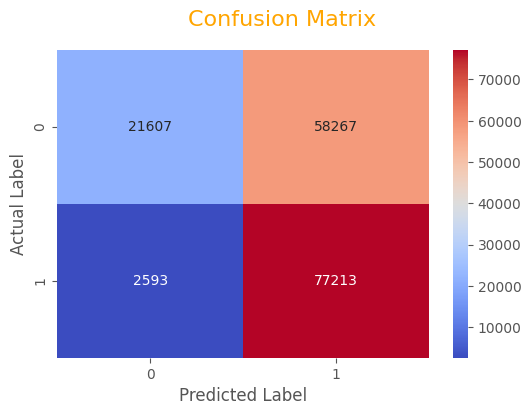

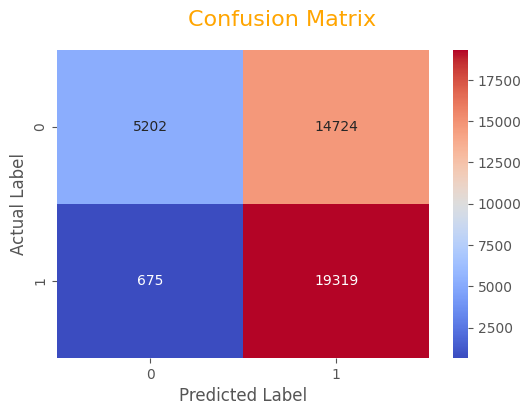

In [ ]:
GNB_model(X_smote, y_smote)

# **SENITMENT ANALYSIS USING VADER**

In [ ]:
main_df

,Transaction_ID,Customer_ID,Transaction_DateTime,Transaction_Type,Category,Merchant_ID,Merchant_Location,Payment_Type,Age,Gender,Marital_Status,Location_Type,Location_City,Life_Stage,Occupation,Household_Income,Preferred_Language,Interests_Hobbies,Customer_Loyalty_Score,Signup_Date,Review_ID,Category_Review,Review_Text,Review_Rating,Amount,Old_Balance,New_Balance,IsFraud
0,T000002,C07540,01-01-2023 01:00,PAYMENT,Technology,M9440,Los Angeles,Credit,67,Female,Single,Rural,Houston,Married,Teacher,39679,Spanish,Travel,1.30,23-08-2042,R009739,Entertainment,This is a must-have for anyone! I was blown aw...,5,9839.64,170136.0,160296.36,0
1,T000002,C07540,01-01-2023 01:00,PAYMENT,Technology,M9440,Los Angeles,Credit,67,Female,Single,Rural,Houston,Married,Teacher,39679,Spanish,Travel,1.30,23-08-2042,R012285,Health,Terrible experience! The support was unhelpful...,1,1864.28,21249.0,19384.72,0
2,T021970,C07540,04-07-2025 09:00,CASH-IN,Health,M5421,Phoenix,Mobile Payment,67,Female,Single,Rural,Houston,Married,Teacher,39679,Spanish,Travel,1.30,23-08-2042,R009739,Entertainment,Truly a wonderful experience! I will definitel...,5,181.00,181.0,0.00,1
3,T021970,C07540,04-07-2025 09:00,CASH-IN,Health,M5421,Phoenix,Mobile Payment,67,Female,Single,Rural,Houston,Married,Teacher,39679,Spanish,Travel,1.30,23-08-2042,R012285,Health,I was treated poorly and felt my concerns were...,1,181.00,181.0,0.00,1
4,T000003,C05794,01-01-2023 02:00,DEBIT,Health,M6868,Chicago,Credit,53,Male,Single,Rural,New York,Married,Doctor,42610,Hindi,Travel,1.31,11-11-2037,R005901,Shopping,Really enjoyed my visit! The care provided was...,4,11668.14,41554.0,29885.86,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99911,T119897,C32244,04-09-2036 16:00,CASH-OUT,Health,M7376,Phoenix,Debit,62,Male,Divorced,Rural,Phoenix,Married,Engineer,55431,English,Cooking,1.05,13-04-2110,R020664,Shopping,It was decent. I had a satisfactory experience...,3,458837.04,0.0,0.00,0
99912,T119901,C01406,04-09-2036 20:00,TRANSFER,Health,M6086,New York,Debit,20,Female,Single,Rural,Los Angeles,Divorced,Doctor,30056,English,Reading,2.69,06-11-2025,R029359,Technology,It was decent. I had a satisfactory experience...,3,194846.54,0.0,0.00,0
99913,T119927,C10480,05-09-2036 22:00,PAYMENT,Shopping,M1794,Phoenix,Debit,69,Male,Divorced,Rural,Los Angeles,Married,Doctor,117422,French,Gaming,2.09,10-09-2050,R009934,Shopping,The products did not match the description at ...,1,526322.08,0.0,0.00,0
99914,T119960,C00253,07-09-2036 07:00,PAYMENT,Technology,M5390,Chicago,Mobile Payment,22,Male,Divorced,Suburban,New York,Married,Scientist,123508,English,Reading,2.63,10-09-2022,R022081,Health,I had a fantastic experience! The technology i...,4,744899.87,37041.0,0.00,0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [ ]:
sa = main_df.copy()

In [ ]:
print(sa.shape)

(99916, 28)


In [ ]:
sa.head()

,Transaction_ID,Customer_ID,Transaction_DateTime,Transaction_Type,Category,Merchant_ID,Merchant_Location,Payment_Type,Age,Gender,Marital_Status,Location_Type,Location_City,Life_Stage,Occupation,Household_Income,Preferred_Language,Interests_Hobbies,Customer_Loyalty_Score,Signup_Date,Review_ID,Category_Review,Review_Text,Review_Rating,Amount,Old_Balance,New_Balance,IsFraud
0,T000002,C07540,01-01-2023 01:00,PAYMENT,Technology,M9440,Los Angeles,Credit,67,Female,Single,Rural,Houston,Married,Teacher,39679,Spanish,Travel,1.30,23-08-2042,R009739,Entertainment,This is a must-have for anyone! I was blown aw...,5,9839.64,170136.0,160296.36,0
1,T000002,C07540,01-01-2023 01:00,PAYMENT,Technology,M9440,Los Angeles,Credit,67,Female,Single,Rural,Houston,Married,Teacher,39679,Spanish,Travel,1.30,23-08-2042,R012285,Health,Terrible experience! The support was unhelpful...,1,1864.28,21249.0,19384.72,0
2,T021970,C07540,04-07-2025 09:00,CASH-IN,Health,M5421,Phoenix,Mobile Payment,67,Female,Single,Rural,Houston,Married,Teacher,39679,Spanish,Travel,1.30,23-08-2042,R009739,Entertainment,Truly a wonderful experience! I will definitel...,5,181.00,181.0,0.00,1
3,T021970,C07540,04-07-2025 09:00,CASH-IN,Health,M5421,Phoenix,Mobile Payment,67,Female,Single,Rural,Houston,Married,Teacher,39679,Spanish,Travel,1.30,23-08-2042,R012285,Health,I was treated poorly and felt my concerns were...,1,181.00,181.0,0.00,1
4,T000003,C05794,01-01-2023 02:00,DEBIT,Health,M6868,Chicago,Credit,53,Male,Single,Rural,New York,Married,Doctor,42610,Hindi,Travel,1.31,11-11-2037,R005901,Shopping,Really enjoyed my visit! The care provided was...,4,11668.14,41554.0,29885.86,0


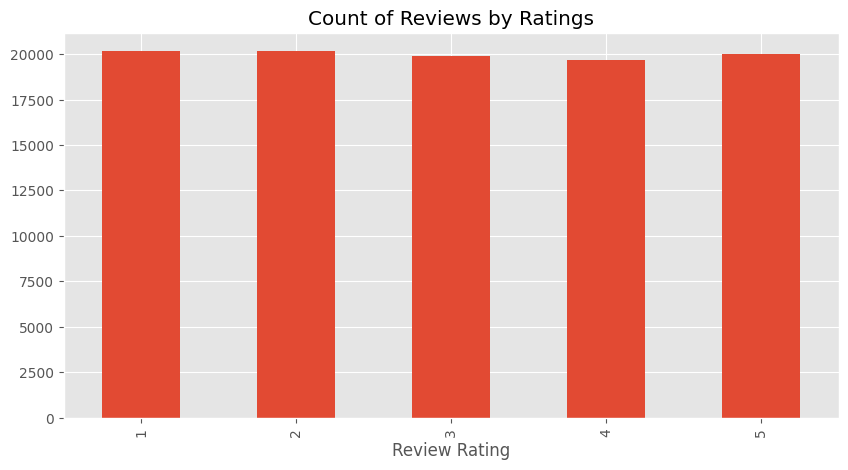

In [ ]:
ax = sa['Review_Rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Ratings',
          figsize=(10, 5))
ax.set_xlabel('Review Rating')
plt.show()

**VADER Sentiment Scoring**

Using Vader Tool (Valence Aware Dictionary and sEntiment Reasoner) to determine sentiment polarity (positive, neutral, or negative)

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

Running polarity score on the entire dataset

In [ ]:
res = {}
for i, row in tqdm(sa.iterrows(), total=len(sa)):
    text = row['Review_Text']
    myid = row['Transaction_ID']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/99916 [00:00<?, ?it/s]

In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Transaction_ID'})
vaders = vaders.merge(sa, how='left')

In [ ]:
vaders.head()

,Transaction_ID,neg,neu,pos,compound,Customer_ID,Transaction_DateTime,Transaction_Type,Category,Merchant_ID,Merchant_Location,Payment_Type,Age,Gender,Marital_Status,Location_Type,Location_City,Life_Stage,Occupation,Household_Income,Preferred_Language,Interests_Hobbies,Customer_Loyalty_Score,Signup_Date,Review_ID,Category_Review,Review_Text,Review_Rating,Amount,Old_Balance,New_Balance,IsFraud
0,T000002,0.347,0.488,0.165,-0.4574,C07540,01-01-2023 01:00,PAYMENT,Technology,M9440,Los Angeles,Credit,67,Female,Single,Rural,Houston,Married,Teacher,39679,Spanish,Travel,1.30,23-08-2042,R009739,Entertainment,This is a must-have for anyone! I was blown aw...,5,9839.64,170136.0,160296.36,0
1,T000002,0.347,0.488,0.165,-0.4574,C07540,01-01-2023 01:00,PAYMENT,Technology,M9440,Los Angeles,Credit,67,Female,Single,Rural,Houston,Married,Teacher,39679,Spanish,Travel,1.30,23-08-2042,R012285,Health,Terrible experience! The support was unhelpful...,1,1864.28,21249.0,19384.72,0
2,T021970,0.000,0.868,0.132,0.1326,C07540,04-07-2025 09:00,CASH-IN,Health,M5421,Phoenix,Mobile Payment,67,Female,Single,Rural,Houston,Married,Teacher,39679,Spanish,Travel,1.30,23-08-2042,R009739,Entertainment,Truly a wonderful experience! I will definitel...,5,181.00,181.0,0.00,1
3,T021970,0.000,0.868,0.132,0.1326,C07540,04-07-2025 09:00,CASH-IN,Health,M5421,Phoenix,Mobile Payment,67,Female,Single,Rural,Houston,Married,Teacher,39679,Spanish,Travel,1.30,23-08-2042,R012285,Health,I was treated poorly and felt my concerns were...,1,181.00,181.0,0.00,1
4,T000003,0.000,0.497,0.503,0.7955,C05794,01-01-2023 02:00,DEBIT,Health,M6868,Chicago,Credit,53,Male,Single,Rural,New York,Married,Doctor,42610,Hindi,Travel,1.31,11-11-2037,R005901,Shopping,Really enjoyed my visit! The care provided was...,4,11668.14,41554.0,29885.86,0


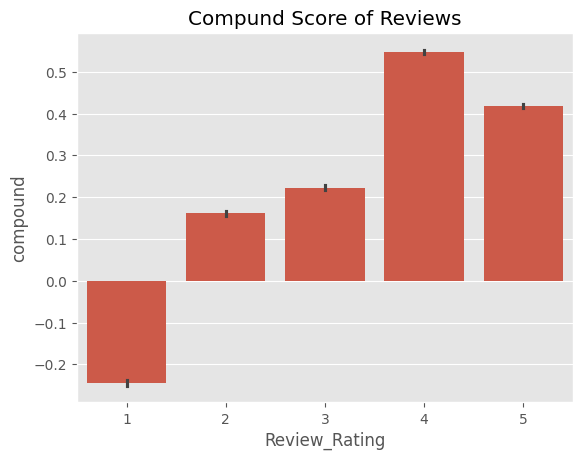

In [ ]:
ax = sns.barplot(data=vaders, x='Review_Rating', y='compound')
ax.set_title('Compund Score of Reviews')
plt.show()

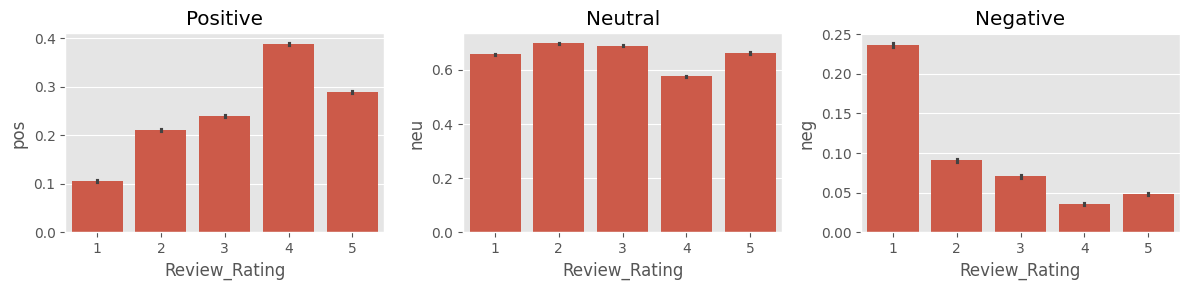

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Review_Rating', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Review_Rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Review_Rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

Grouping by categories and calculating the mean for each sentiment score

In [ ]:
category_sentiment = vaders.groupby('Category')[['neg', 'neu', 'pos', 'compound']].mean().reset_index()
print(category_sentiment)

     Category       neg       neu       pos  compound
0        Food  0.083124  0.661389  0.255545  0.246781
1      Health  0.096978  0.630421  0.272601  0.256461
2    Shopping  0.113085  0.669841  0.217053  0.150801
3  Technology  0.110053  0.659643  0.230285  0.173792
4      Travel  0.081524  0.664507  0.253969  0.268027


*Bar Chart for every Category*

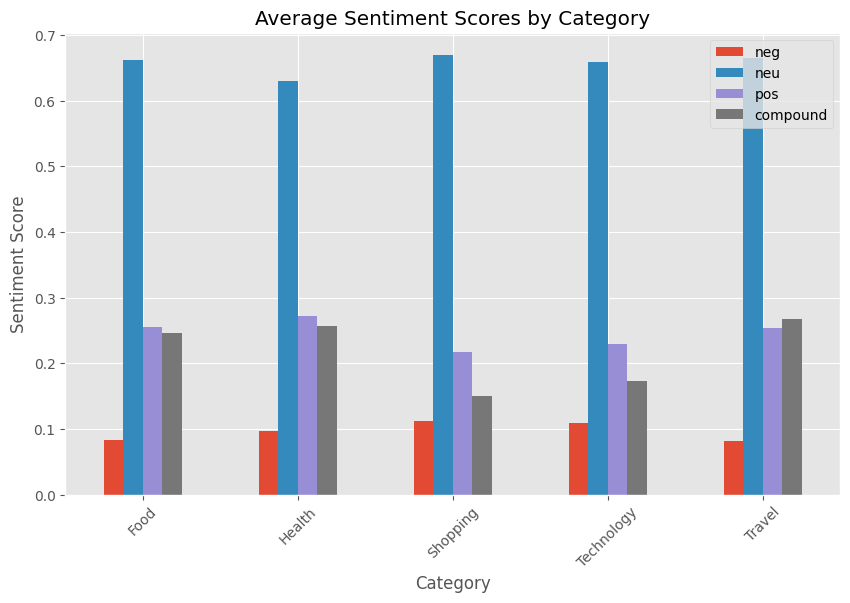

In [ ]:
import matplotlib.pyplot as plt
category_sentiment.set_index('Category')[['neg', 'neu', 'pos', 'compound']].plot(kind='bar', figsize=(10, 6))

plt.title('Average Sentiment Scores by Category')
plt.ylabel('Sentiment Score')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.show()

*Pie charts for each category*

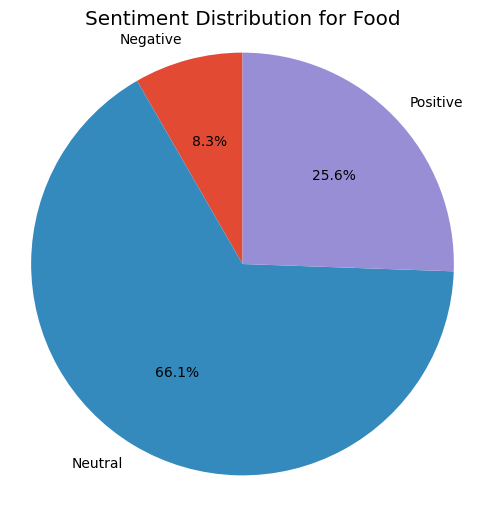

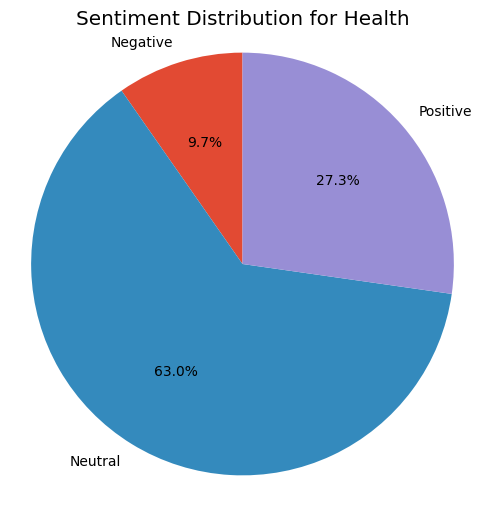

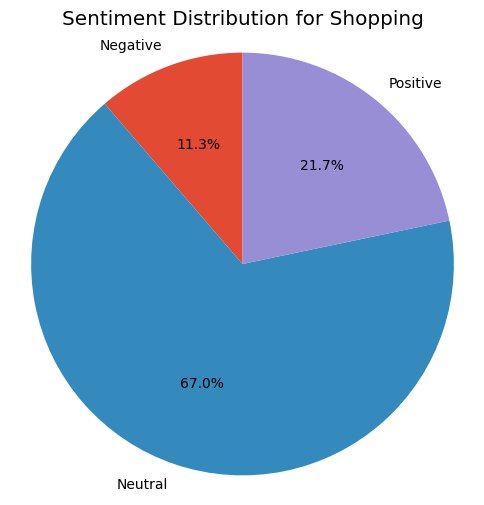

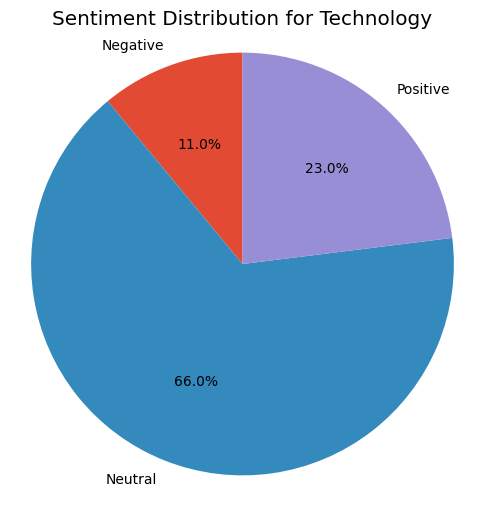

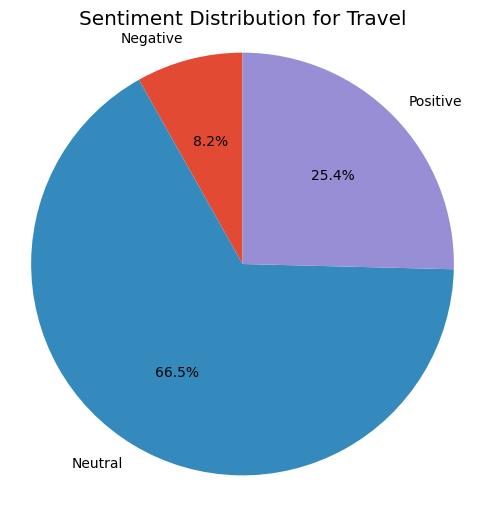

In [ ]:
for category in category_sentiment['Category']:
    data = category_sentiment[category_sentiment['Category'] == category][['neg', 'neu', 'pos']]
    sentiment_labels = ['Negative', 'Neutral', 'Positive']
    sentiment_data = [data['neg'].values[0], data['neu'].values[0], data['pos'].values[0]]

    plt.figure(figsize=(6, 6))
    plt.pie(sentiment_data, labels=sentiment_labels, autopct='%1.1f%%', startangle=90)
    plt.title(f'Sentiment Distribution for {category}')
    plt.axis('equal')
    plt.show()


*Stacked bar chart for sentiment proportions (neg, neu, pos)*

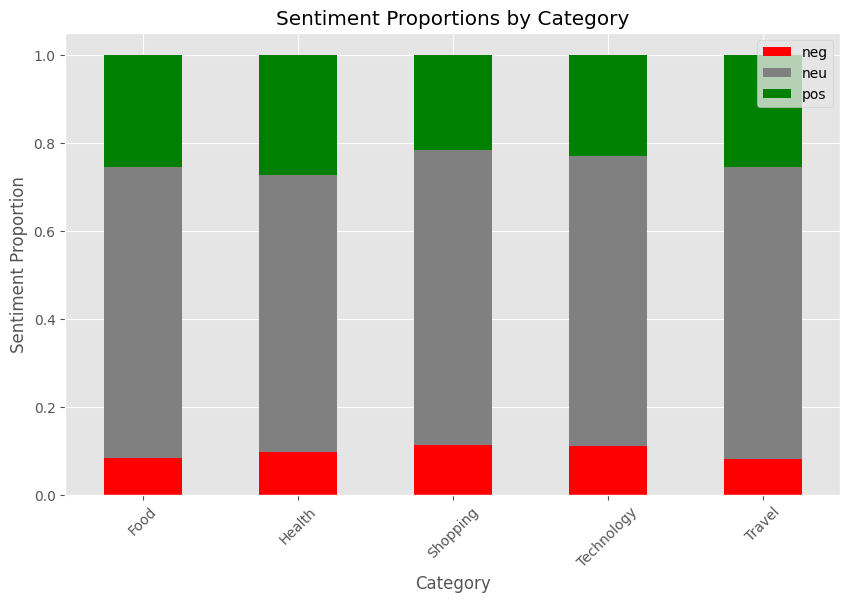

In [ ]:
category_sentiment.set_index('Category')[['neg', 'neu', 'pos']].plot(kind='bar', stacked=True, figsize=(10, 6), color=['red', 'gray', 'green'])

plt.title('Sentiment Proportions by Category')
plt.ylabel('Sentiment Proportion')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.show()


*Bar plot for compound score across categories*

<ipython-input-275-625bf80931e3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='compound', data=category_sentiment, palette='cool')


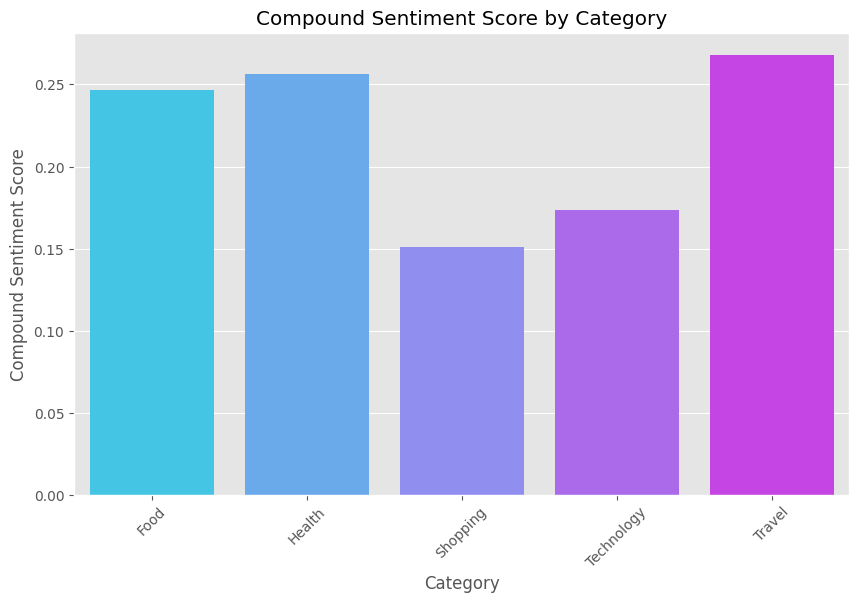

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='compound', data=category_sentiment, palette='cool')
plt.title('Compound Sentiment Score by Category')
plt.ylabel('Compound Sentiment Score')
plt.xticks(rotation=45)
plt.show()


*Boxplot of Sentiment Scores*

<ipython-input-276-500367b6bac3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='compound', data=vaders, palette='Set2')


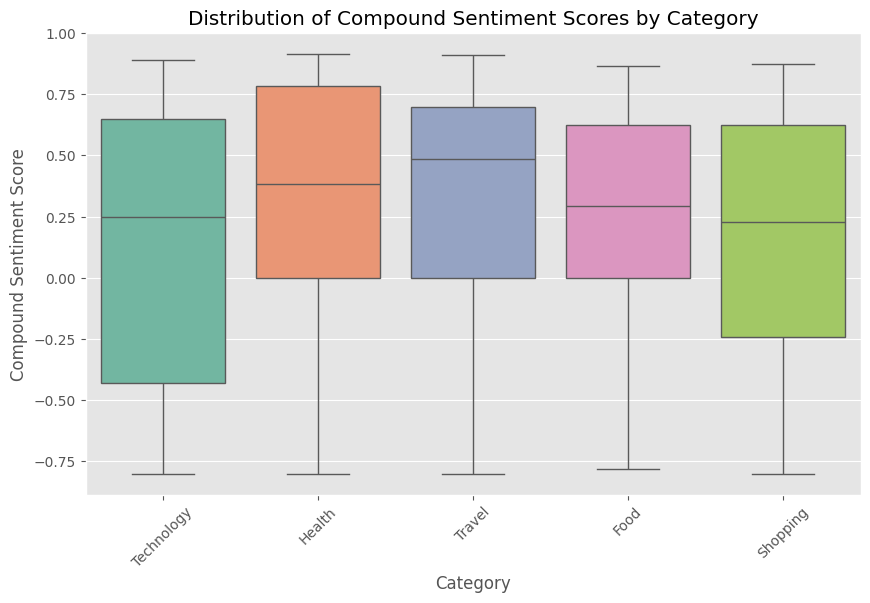

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='compound', data=vaders, palette='Set2')

plt.title('Distribution of Compound Sentiment Scores by Category')
plt.xlabel('Category')
plt.ylabel('Compound Sentiment Score')
plt.xticks(rotation=45)
plt.show()

*Histogram for compound sentiment score by category*

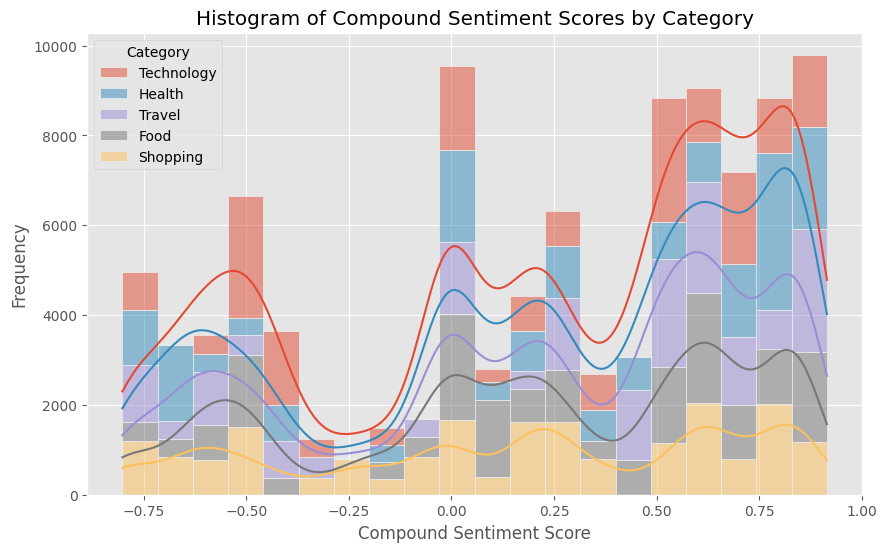

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=vaders, x='compound', hue='Category', multiple="stack", bins=20, kde=True)

plt.title('Histogram of Compound Sentiment Scores by Category')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.show()


*Heatmap of sentiment scores*

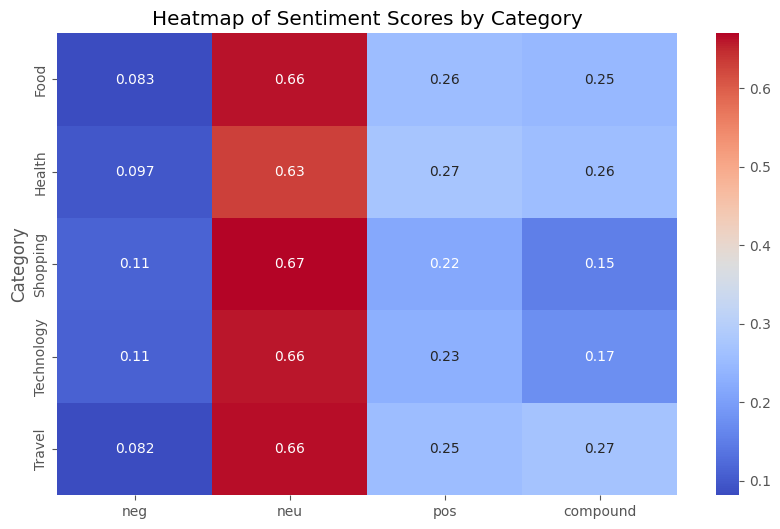

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(category_sentiment.set_index('Category')[['neg', 'neu', 'pos', 'compound']], annot=True, cmap='coolwarm', cbar=True)

plt.title('Heatmap of Sentiment Scores by Category')
plt.ylabel('Category')
plt.show()


*Boxplot for Customer Loyalty Score vs Compound Sentiment*


This shows the relationship between customer loyalty scores and sentiment, helping identify if more loyal customers tend to leave more positive or negative reviews.

<ipython-input-279-9b6bfa5e1835>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Customer_Loyalty_Score', y='compound', data=vaders, palette='cool')


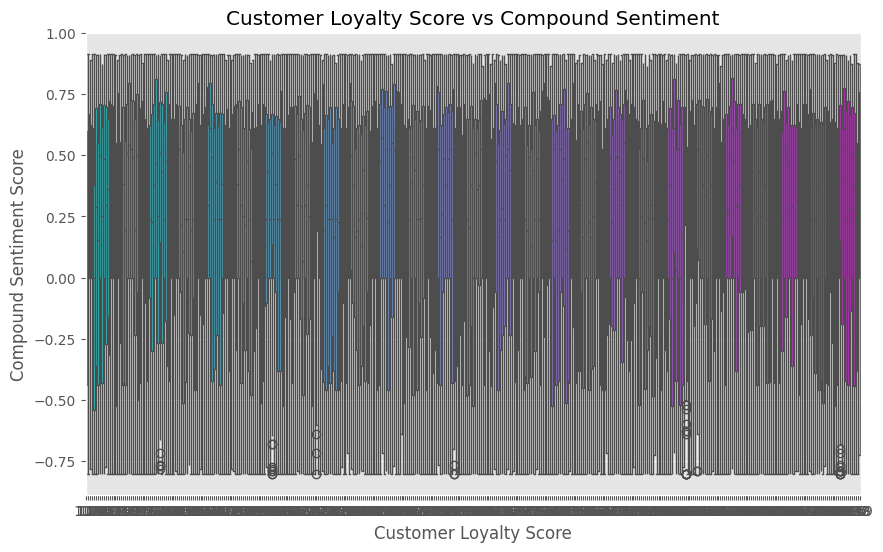

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Customer_Loyalty_Score', y='compound', data=vaders, palette='cool')
plt.title('Customer Loyalty Score vs Compound Sentiment')
plt.xlabel('Customer Loyalty Score')
plt.ylabel('Compound Sentiment Score')
plt.show()


*Box Plot for Sentiment by Review Rating*

<ipython-input-280-07e3033961a9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Review_Rating', y='compound', data=vaders, palette='Set1')


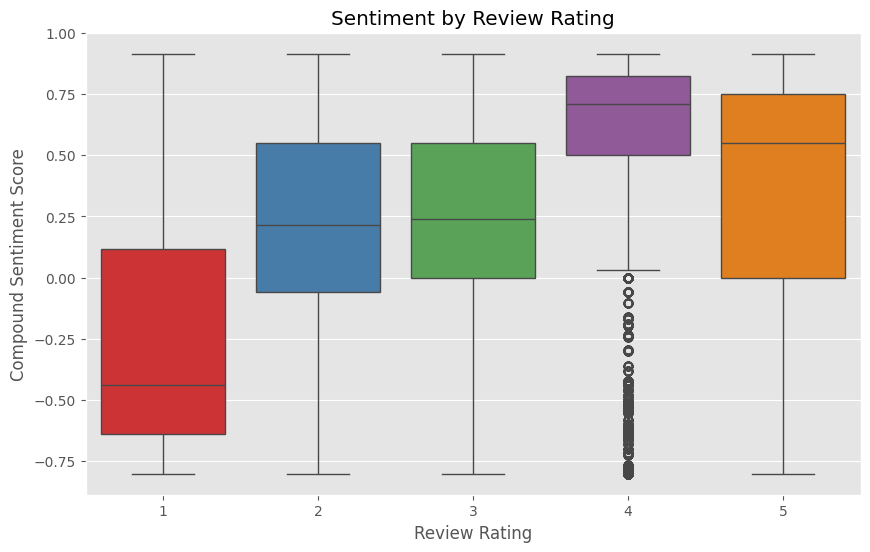

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Review_Rating', y='compound', data=vaders, palette='Set1')
plt.title('Sentiment by Review Rating')
plt.xlabel('Review Rating')
plt.ylabel('Compound Sentiment Score')
plt.show()


*Bar Plot Sentiment by Customer Gender*

<ipython-input-281-6b8516d0235c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='compound', data=vaders, palette='cool')


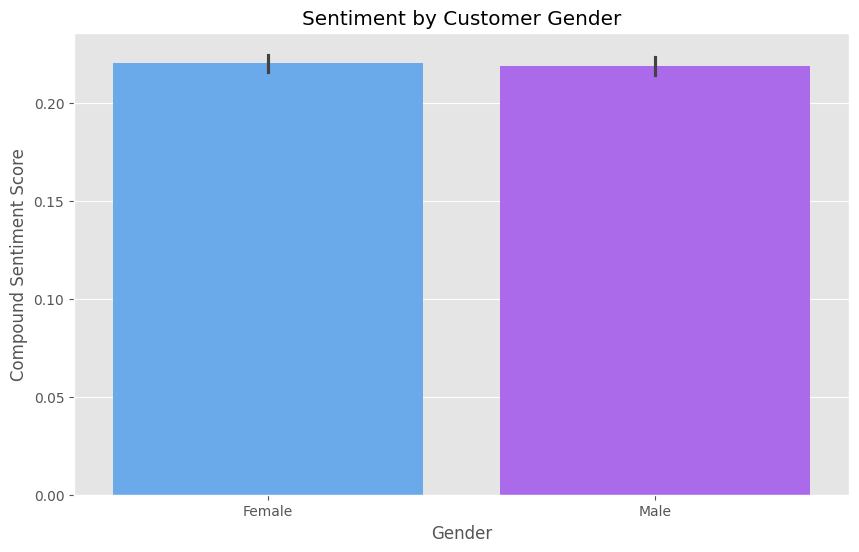

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='compound', data=vaders, palette='cool')
plt.title('Sentiment by Customer Gender')
plt.xlabel('Gender')
plt.ylabel('Compound Sentiment Score')
plt.show()


*Box Plot for Sentiment by Customer Age*

<ipython-input-282-506d73ad129b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age', y='compound', data=vaders, palette='coolwarm')


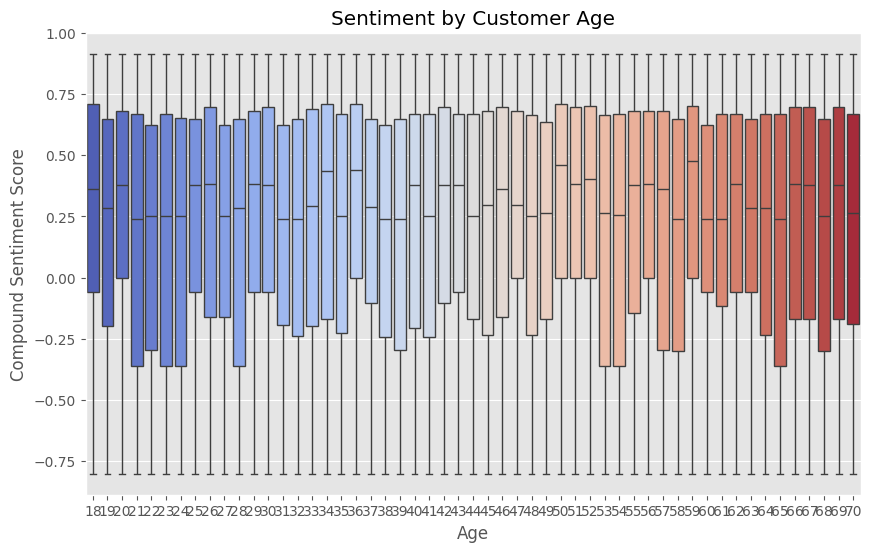

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='compound', data=vaders, palette='coolwarm')
plt.title('Sentiment by Customer Age')
plt.xlabel('Age')
plt.ylabel('Compound Sentiment Score')
plt.show()